# Equipe - Forest Fires in Brazil

Helio Victor Flexa dos Santos - 2019006680

Matheus Prado Miranda - 2019007023

Kaio Lucas de Sá - 2019006850

Vitor de Oliveira Mafra - 2018046831


**Apresentação final**: https://youtu.be/exMxEBNdZ8k

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as ss
import seaborn as sns
import plotly
import plotly.express as px
import json
from urllib.request import urlopen

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.kernel_ridge import KernelRidge
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

plt.ion()

In [ ]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

### Um breve prefácio

In [ ]:
df_original = pd.read_csv('https://raw.githubusercontent.com/userhv/Forest-Fires-in-Brazil/main/database/amazon.csv', encoding='ISO-8859-1')
df_original.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [ ]:
df_original['number'].unique()

array([  0.   ,  10.   ,  12.   , ...,   2.032, 833.   , 623.   ])

In [ ]:
estados = df_original['state'].unique()
estados

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [ ]:
len(df_original['state'].unique())

23

#### 23 Estados? Como assim?

Vamos começar procurando similaridades entre Estados

In [ ]:
df_original[df_original['state'] == "Minas Gerais"]

,year,state,month,number,date
2869,1998,Minas Gerais,Janeiro,0.0,1998-01-01
2870,1999,Minas Gerais,Janeiro,36.0,1999-01-01
2871,2000,Minas Gerais,Janeiro,24.0,2000-01-01
2872,2001,Minas Gerais,Janeiro,18.0,2001-01-01
2873,2002,Minas Gerais,Janeiro,29.0,2002-01-01
...,...,...,...,...,...
3103,2012,Minas Gerais,Dezembro,189.0,2012-01-01
3104,2013,Minas Gerais,Dezembro,98.0,2013-01-01
3105,2014,Minas Gerais,Dezembro,155.0,2014-01-01
3106,2015,Minas Gerais,Dezembro,295.0,2015-01-01


In [ ]:
df_original[df_original['state'] == "Amazonas"]

,year,state,month,number,date
718,1998,Amazonas,Janeiro,0.0,1998-01-01
719,1999,Amazonas,Janeiro,3.0,1999-01-01
720,2000,Amazonas,Janeiro,7.0,2000-01-01
721,2001,Amazonas,Janeiro,3.0,2001-01-01
722,2002,Amazonas,Janeiro,17.0,2002-01-01
...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01
953,2013,Amazonas,Dezembro,236.0,2013-01-01
954,2014,Amazonas,Dezembro,293.0,2014-01-01
955,2015,Amazonas,Dezembro,565.0,2015-01-01


Tanto Minas Gerais como Amazonas têm 239 linhas. Isso faz sentido, já que são 12 meses * 20 anos (=240 observações)

#### Mato Grosso [...]??

In [ ]:
df_original[df_original['state'] == "Mato Grosso"]

,year,state,month,number,date
2391,1998,Mato Grosso,Janeiro,0.0,1998-01-01
2392,1999,Mato Grosso,Janeiro,39.0,1999-01-01
2393,2000,Mato Grosso,Janeiro,44.0,2000-01-01
2394,2001,Mato Grosso,Janeiro,44.0,2001-01-01
2395,2002,Mato Grosso,Janeiro,172.0,2002-01-01
...,...,...,...,...,...
2864,2012,Mato Grosso,Dezembro,194.0,2012-01-01
2865,2013,Mato Grosso,Dezembro,195.0,2013-01-01
2866,2014,Mato Grosso,Dezembro,84.0,2014-01-01
2867,2015,Mato Grosso,Dezembro,394.0,2015-01-01


478 observações? Justamente o dobro do esperado

#### Rio? Rio Grande do Norte? Rio Grande do Sul? Rio de Janeiro? 

In [ ]:
df_original[df_original['state'] == "Rio"]

,year,state,month,number,date
4303,1998,Rio,Janeiro,0.0,1998-01-01
4304,1999,Rio,Janeiro,0.0,1999-01-01
4305,2000,Rio,Janeiro,0.0,2000-01-01
4306,2001,Rio,Janeiro,0.0,2001-01-01
4307,2002,Rio,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
5015,2012,Rio,Dezembro,38.0,2012-01-01
5016,2013,Rio,Dezembro,62.0,2013-01-01
5017,2014,Rio,Dezembro,31.0,2014-01-01
5018,2015,Rio,Dezembro,42.0,2015-01-01


717? Agora temos o triplo

<b>Importante</b>: Ao que tudo indica, o autor dessa base de dados agrupou os estados que começam com a palavra "Rio" (i.e., Rio Grande do Norte, Rio Grande do Sul e Rio de Janeiro), assim como os estados que começam com Mato Grosso e Mato Grosso do Sul

#### (Re)encontrando a base de dados

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/userhv/Forest-Fires-in-Brazil/main/database/incendiosflorestais_focoscalor_estados.csv',sep='\t')
area_estado = pd.read_csv('https://raw.githubusercontent.com/userhv/Forest-Fires-in-Brazil/main/database/Area_Plantada_Estado.csv', sep=';')

In [ ]:
df.head()

,Ano,Estado,Mês,Número,Período
0,1998,Acre,Janeiro,0,01/01/1998
1,1999,Acre,Janeiro,0,01/01/1999
2,2000,Acre,Janeiro,0,01/01/2000
3,2001,Acre,Janeiro,0,01/01/2001
4,2002,Acre,Janeiro,0,01/01/2002



## *Pergunta 1 - Em qual estação do ano ocorrem mais incêndios florestais?*


### Análise de Dados - Pergunta 1

In [ ]:
df_verao = df.query('Mês == "Janeiro" or Mês == "Fevereiro" or Mês == "Março"').groupby('Ano').sum()['Número']
df_outono = df.query('Mês == "Abril" or Mês == "Maio" or Mês == "Junho"').groupby('Ano').sum()['Número']
df_inverno = df.query('Mês == "Julho" or Mês == "Agosto" or Mês == "Setembro"').groupby('Ano').sum()['Número']
df_primavera = df.query('Mês == "Outubro" or Mês == "Novembro" or Mês == "Dezembro"').groupby('Ano').sum()['Número']

In [ ]:
data_estacao = pd.DataFrame({'verao':df_verao, 'outono': df_outono, 'inverno': df_inverno, 'primavera': df_primavera})
data_estacao

,verao,outono,inverno,primavera
Ano,,,,
1998,0,3551,85583,34747
1999,3032,6161,85155,40248
2000,2187,8909,50232,40200
2001,2874,11604,78211,52878
2002,4903,16339,126705,87845
2003,10238,10930,131865,82209
2004,6000,19132,156634,88618
2005,8849,10032,143901,77982
2006,6695,3568,89992,36635


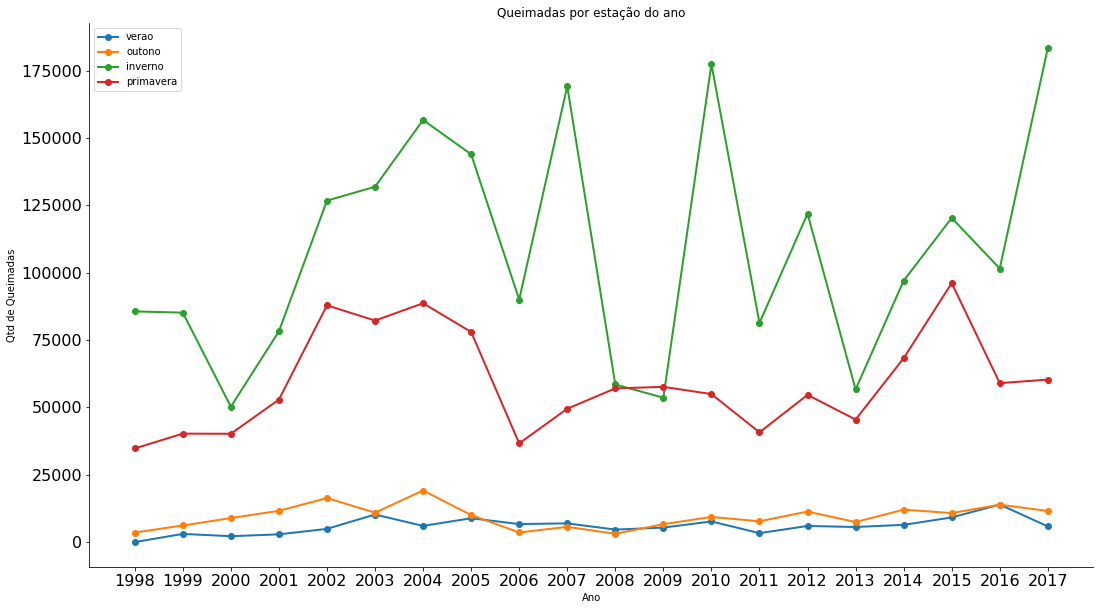

In [ ]:
data_estacao.plot(figsize=(18, 10),fontsize=16, lw=2, marker="o")
plt.xlabel('Ano')
plt.ylabel('Qtd de Queimadas')
plt.title('Queimadas por estação do ano')
plt.xticks(data_estacao.index)
plt.legend()
despine()

In [ ]:
print("Números de queimadas por estação de 1998 até 2017")
print(f"Numero de queimadas no inverno:   {df_inverno.sum():.2f}")
print(f"Numero de queimadas na primavera: {df_primavera.sum():.2f}")
print(f"Numero de queimadas no outono:    {df_outono.sum():.2f}")
print(f"Numero de queimadas no verão:     {df_verao.sum():.2f}")

Números de queimadas por estação de 1998 até 2017
Numero de queimadas no inverno:   2168876.00
Numero de queimadas na primavera: 1184884.00
Numero de queimadas no outono:    189668.00
Numero de queimadas no verão:     119602.00


In [ ]:
print("Média de queimadas por estação de 1998 até 2017")
print(f"Media de queimadas no inverno:    {df_inverno.mean():.2f}")
print(f"Media de queimadas na primavera:  {df_primavera.mean():.2f}")
print(f"Media de queimadas no outono:     {df_outono.mean():.2f}")
print(f"Media de queimadas na verão:      {df_verao.mean():.2f}")

Média de queimadas por estação de 1998 até 2017
Media de queimadas no inverno:    108443.80
Media de queimadas na primavera:  59244.20
Media de queimadas no outono:     9483.40
Media de queimadas na verão:      5980.10


Evidenciando a média de queimadas no inverno e primavera

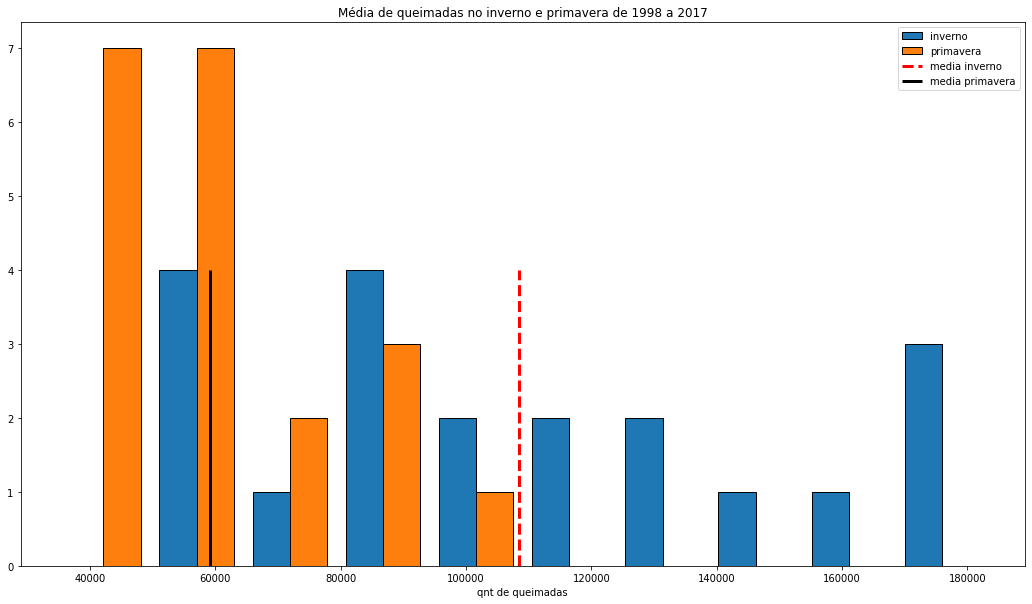

In [ ]:
plt.figure(figsize=(18, 10))
plt.hist([df_inverno,df_primavera],edgecolor='k', bins=None,lw=1,label=['inverno','primavera'])
plt.vlines(df_inverno.mean(), 0, 4, label='media inverno', color='red',linestyles='--',lw=3)
plt.vlines(df_primavera.mean(), 0, 4, label='media primavera', color='black',linestyles='-',lw=3)
plt.xlabel('qnt de queimadas')
plt.title('Média de queimadas no inverno e primavera de 1998 a 2017')
plt.legend()

### Relatório - Pergunta 1

Para responder essa pergunta, utilizamos apenas estatísticas básicas, por se tratar de uma base pequena.

Inicialmente, tratamos a nossa base de dados de modo que ficasse separado as estações do ano desde 1998 até 2017, com isso conseguimos visualizar no gráfico que as estações da primavera e do inverno se destacam dentro as demais por ter um número elevado de queimadas. Evidenciamos isso quando trouxemos a tona a soma de queimadas dessas estações tendo no inverno e primavera, respectivamente, com 2168876.00 e 1184884.00 queimadas nesses 20 anos. Note que a diferença dessas duas estações para as outras duas restantes, verão e outono, é quase duas vezes maior.

Com isso conseguimos responder que dentre os 20 anos analisados, a estação do ano que possui o maior número de queimdas é o inverno.

### Regressão - Pergunta 1

In [ ]:
z_df = (data_estacao-data_estacao.mean())/data_estacao.std(ddof=1)
X = z_df.index
X = X.values
y = z_df['inverno'].values
X = X.reshape(-1, 1)
modelo = LinearRegression()
modelo.fit(X,y)
coef_angular = modelo.coef_[0]
coef_linear = modelo.intercept_
print("Coeficiente angular = {:0.2f}".format(coef_angular))
print("Coeficiente linear = {:0.2f}".format(coef_linear))
print("R2 com normalizacao = ", modelo.score(X, y))

Coeficiente angular = 0.04
Coeficiente linear = -71.41
R2 com normalizacao =  0.044287284988960285


In [ ]:
reta = coef_angular*X+coef_linear

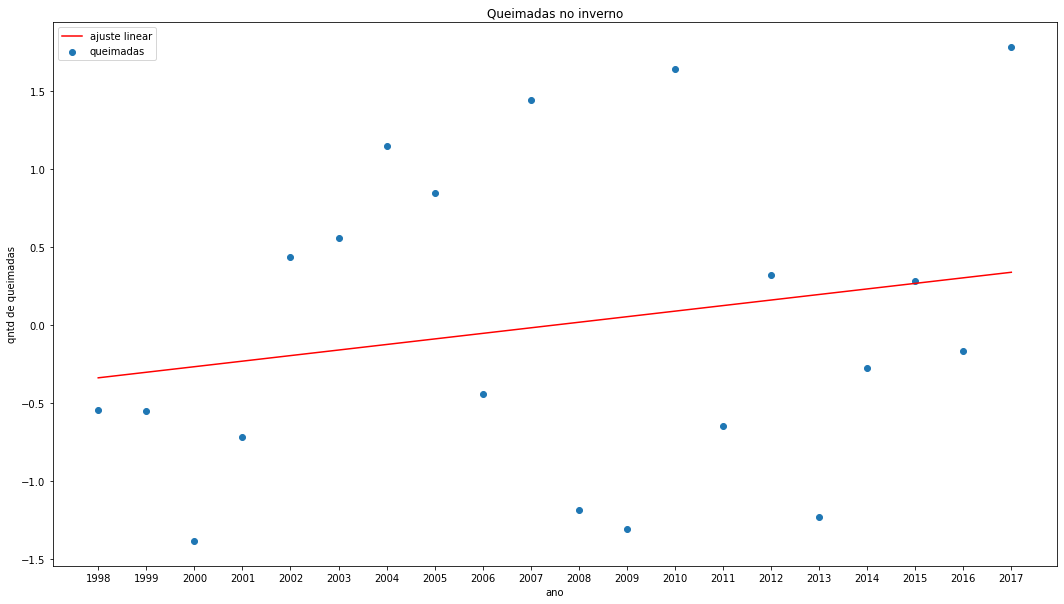

In [ ]:
plt.figure(figsize=(18, 10))
plt.scatter(X,y,label='queimadas');
plt.plot(X,reta,label='ajuste linear',color='red');
plt.xlabel('ano');
plt.ylabel('qntd de queimadas');
plt.title('Queimadas no inverno')
plt.xticks(data_estacao.index)
plt.legend();

### Queimadas por região do Brasil - Pergunta 1

In [ ]:
df_norte = df.query('Estado == "Acre" or Estado == "Amapá" or Estado == "Amazonas" or Estado == "Pará" or Estado == "Roraima" or Estado == "Rondônia" or Estado == "Tocantins"').groupby('Ano').sum()['Número']
df_nordeste = df.query('Estado == "Alagoas" or Estado == "Bahia" or Estado == "Ceará" or Estado == "Maranhão" or Estado == "Paraíba" or Estado == "Pernambuco" or Estado == "Piauí" or Estado == "Rio Grande do Norte" or Estado == "Sergipe"').groupby('Ano').sum()['Número']
df_centro_oeste = df.query('Estado == "Goiás" or Estado == "Mato Grosso" or Estado == "Mato Grosso do Sul"').groupby('Ano').sum()['Número']
df_sudeste = df.query('Estado == "São Paulo" or Estado == "Rio de Janeiro" or Estado == "Minas Gerais" or Estado == "Espírito Santo"').groupby('Ano').sum()['Número']
df_sul = df.query('Estado == "Paraná" or Estado == "Rio Grande do Sul" or Estado == "Santa Catarina"').groupby('Ano').sum()['Número']

In [ ]:
data_regiao = pd.DataFrame({'norte':df_norte, 'nordeste': df_nordeste, 'centro oeste': df_centro_oeste, 'sudeste': df_sudeste, 'sul': df_sul})
data_regiao

,norte,nordeste,centro oeste,sudeste,sul
Ano,,,,,
1998,40710,30215,43619,7602,1414
1999,35997,18825,62327,12046,5115
2000,32149,24202,32946,8773,3235
2001,48601,45033,43054,6967,1718
2002,76639,59108,76032,16013,7554
2003,77567,63618,58668,20106,14479
2004,95573,59088,91439,14134,9697
2005,95963,59833,65810,13720,5225
2006,58940,30336,33401,7851,6071


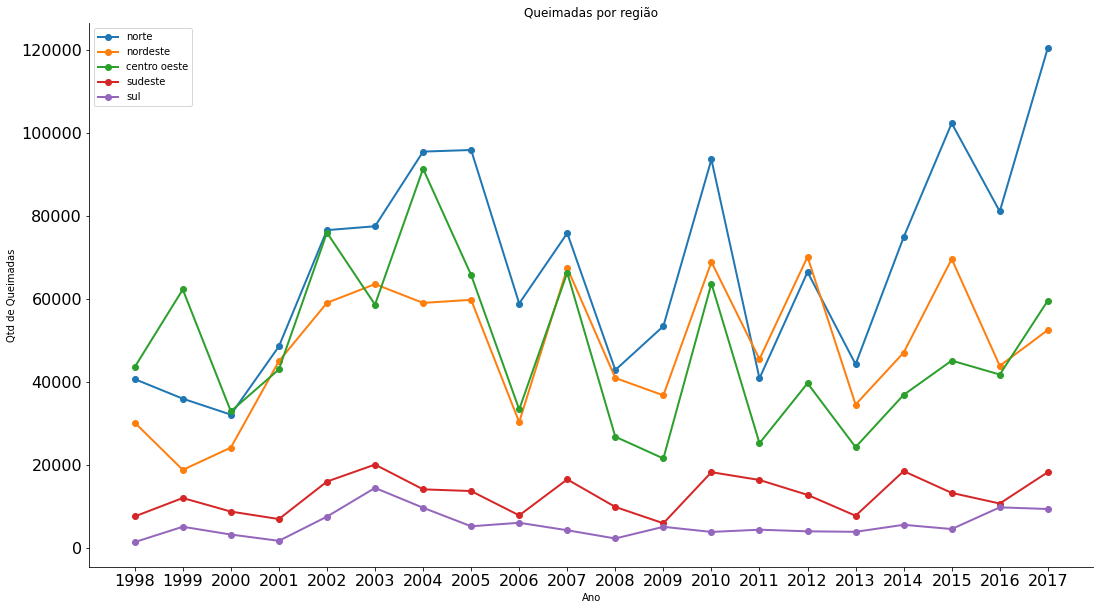

In [ ]:
data_regiao.plot(figsize=(18, 10),fontsize=16, lw=2, marker="o")
plt.xlabel('Ano')
plt.ylabel('Qtd de Queimadas')
plt.title('Queimadas por região')
plt.xticks(data_regiao.index)
plt.legend()
despine()

In [ ]:
print("Números de queimadas por região de 1998 até 2017")
print(f"Numero de queimadas no nordeste:      {df_nordeste.sum():.2f}")
print(f"Numero de queimadas no norte:         {df_norte.sum():.2f}")
print(f"Numero de queimadas no centro-oeste:  {df_centro_oeste.sum():.2f}")
print(f"Numero de queimadas no sudeste:       {df_sudeste.sum():.2f}")
print(f"Numero de queimadas no sul:           {df_sul.sum():.2f}")

Números de queimadas por região de 1998 até 2017
Numero de queimadas no nordeste:      968090.00
Numero de queimadas no norte:         1358917.00
Numero de queimadas no centro-oeste:  958664.00
Numero de queimadas no sudeste:       255600.00
Numero de queimadas no sul:           111652.00


### Estatisticas para as queimadas por região e por estação do ano - Pergunta 1

Medias de queimadas por estação do ano

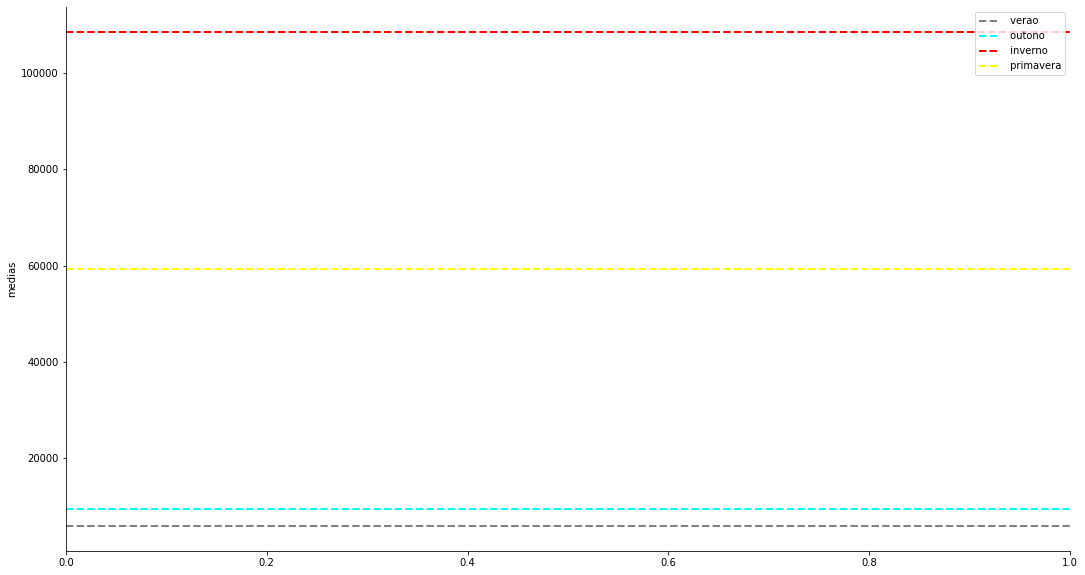

In [ ]:
##Estatísticas básicas
verao_mean = df_verao.mean()
outono_mean = df_outono.mean()
inverno_mean = df_inverno.mean()
primavera_mean = df_primavera.mean()

plt.figure(figsize=(18, 10))
plt.axhline(y=verao_mean, color = 'gray', linestyle='dashed', linewidth = 2, label=' verao')
plt.axhline(y=outono_mean, color = 'cyan', linestyle='dashed', linewidth = 2, label=' outono')
plt.axhline(y=inverno_mean, color = 'red', linestyle='dashed', linewidth = 2, label=' inverno')
plt.axhline(y=primavera_mean, color = 'yellow', linestyle='dashed', linewidth = 2, label=' primavera')
plt.ylabel('medias')
plt.legend()
despine()

Media de queimadas no verão dos anos de 1998 a 2017

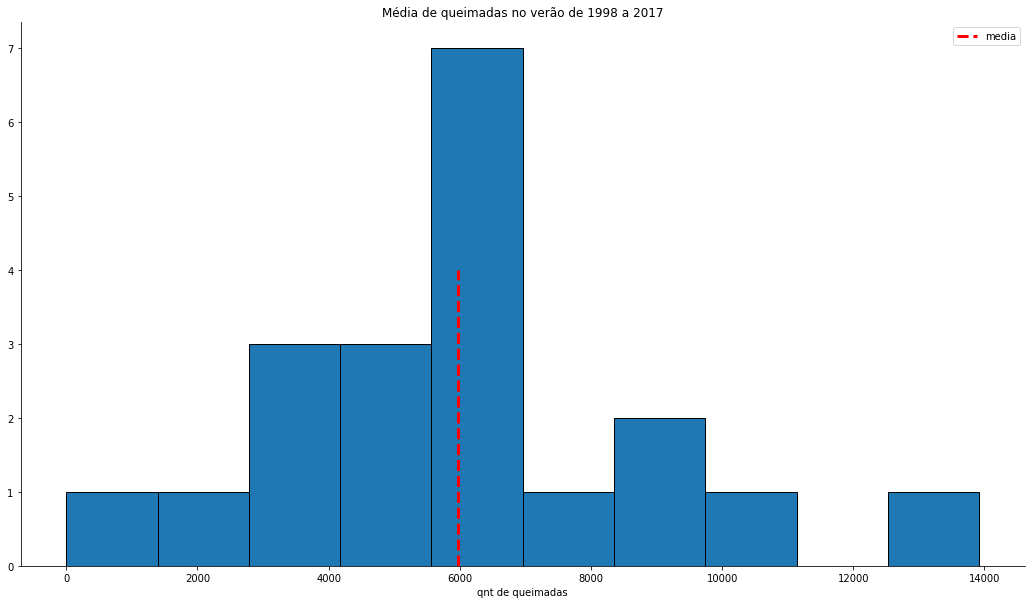

In [ ]:
plt.figure(figsize=(18, 10))
plt.hist(df_verao,edgecolor='k', bins=None,lw=1)
plt.vlines(df_verao.mean(), 0, 4, label='media', color='red',linestyles='--',lw=3)
plt.xlabel('qnt de queimadas')
plt.title('Média de queimadas no verão de 1998 a 2017')
plt.legend()
despine()

Media de queimadas no outono de 1998 a 2017



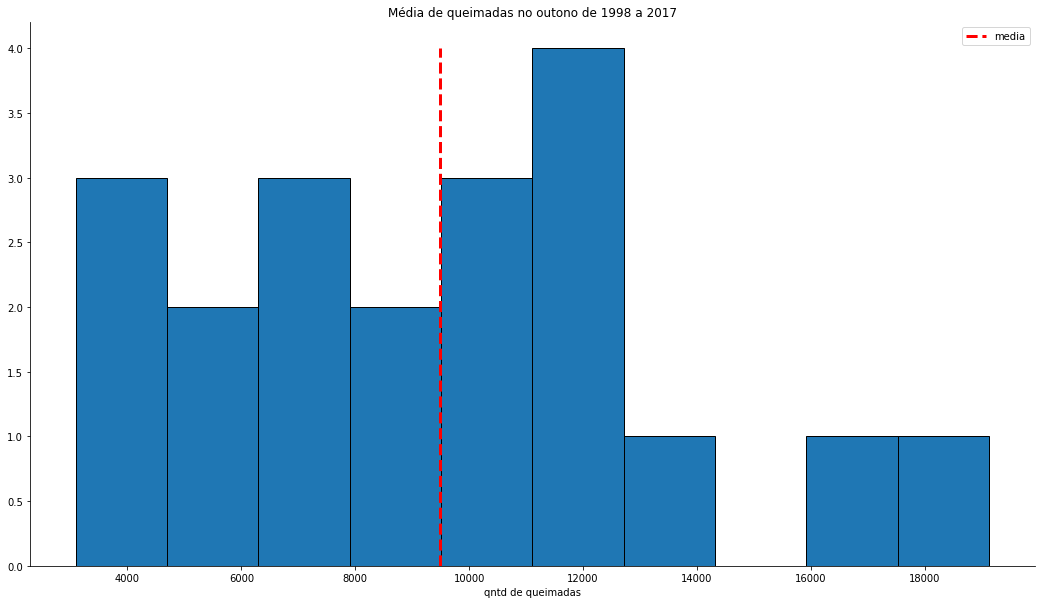

In [ ]:
plt.figure(figsize=(18, 10))
plt.hist(df_outono,edgecolor='k', bins=None,lw=1)
plt.vlines(df_outono.mean(), 0, 4, label='media', color='red',linestyles='--',lw=3)
plt.xlabel('qntd de queimadas')
plt.title('Média de queimadas no outono de 1998 a 2017')
plt.legend()
despine()

Media de queimadas no inverno de 1998 a 2017

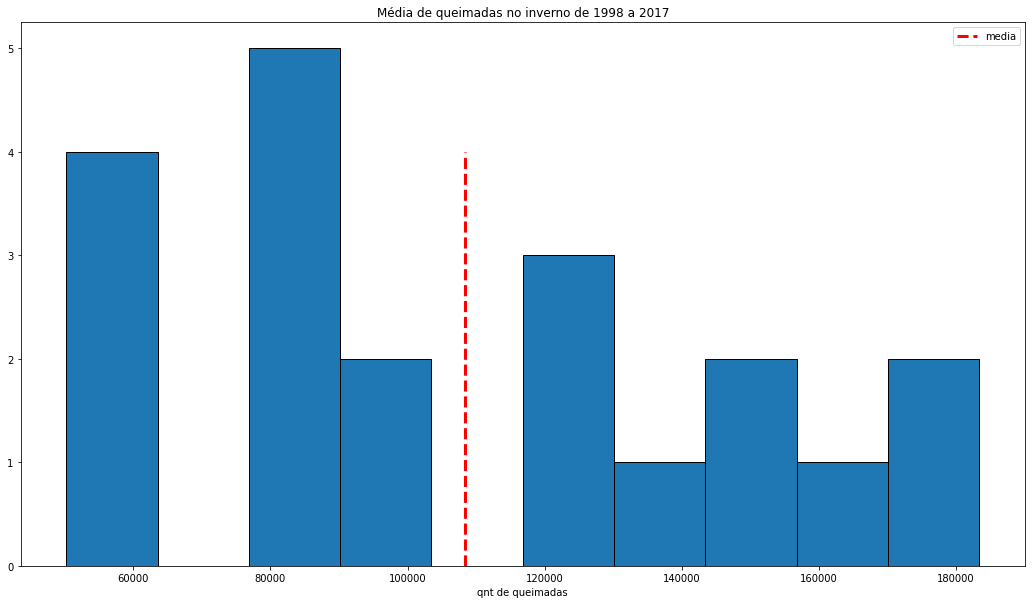

In [ ]:
plt.figure(figsize=(18, 10))
plt.hist(df_inverno,edgecolor='k', bins=None,lw=1)
plt.vlines(df_inverno.mean(), 0, 4, label='media', color='red',linestyles='--',lw=3)
plt.xlabel('qnt de queimadas')
plt.title('Média de queimadas no inverno de 1998 a 2017')
plt.legend()

Media de queimadas na primavera de 1998 a 2017

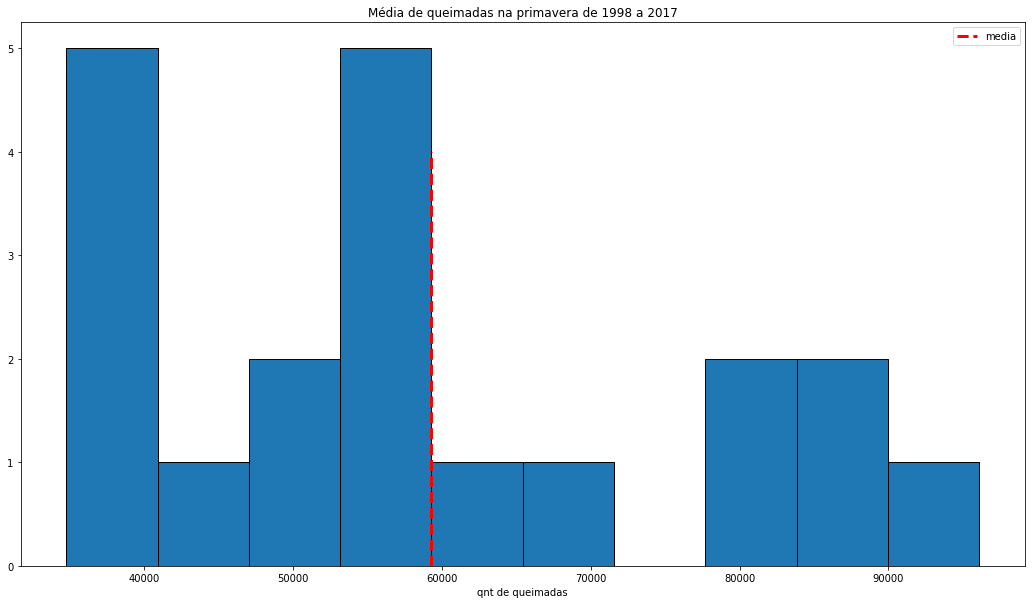

In [ ]:
plt.figure(figsize=(18, 10))
plt.hist(df_primavera,edgecolor='k', bins=None,lw=1)
plt.vlines(df_primavera.mean(), 0, 4, label='media', color='red',linestyles='--',lw=3)
plt.xlabel('qnt de queimadas')
plt.title('Média de queimadas na primavera de 1998 a 2017')
plt.legend()

 Media de queimadas por região


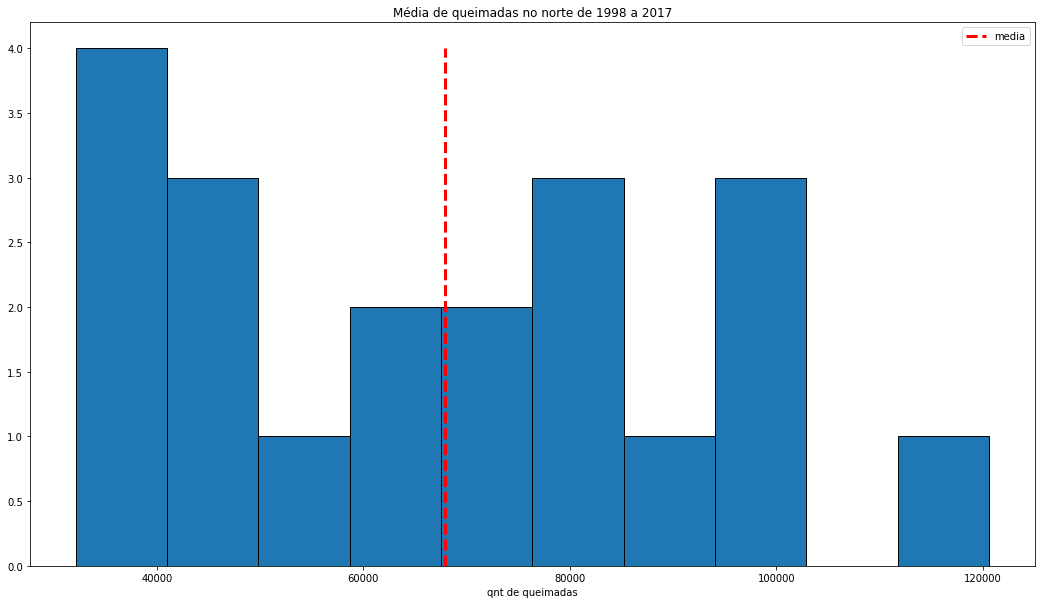

In [ ]:
plt.figure(figsize=(18, 10))
plt.hist(df_norte,edgecolor='k', bins=None,lw=1)
plt.vlines(df_norte.mean(), 0, 4, label='media', color='red',linestyles='--',lw=3)
plt.xlabel('qnt de queimadas')
plt.title('Média de queimadas no norte de 1998 a 2017')
plt.legend()

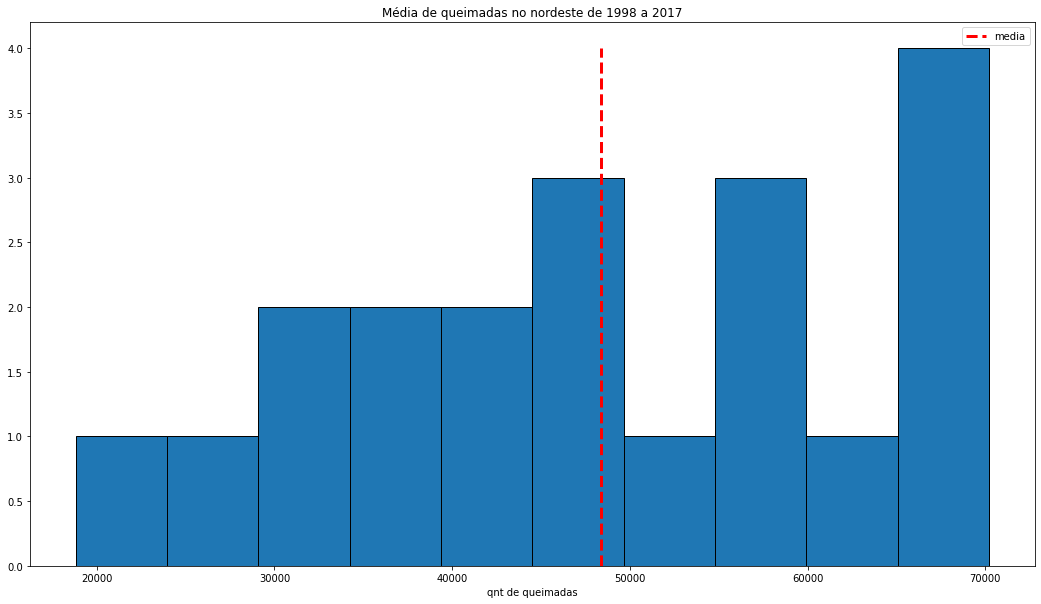

In [ ]:
plt.figure(figsize=(18, 10))
plt.hist(df_nordeste,edgecolor='k', bins=None,lw=1)
plt.vlines(df_nordeste.mean(), 0, 4, label='media', color='red',linestyles='--',lw=3)
plt.xlabel('qnt de queimadas')
plt.title('Média de queimadas no nordeste de 1998 a 2017')
plt.legend()

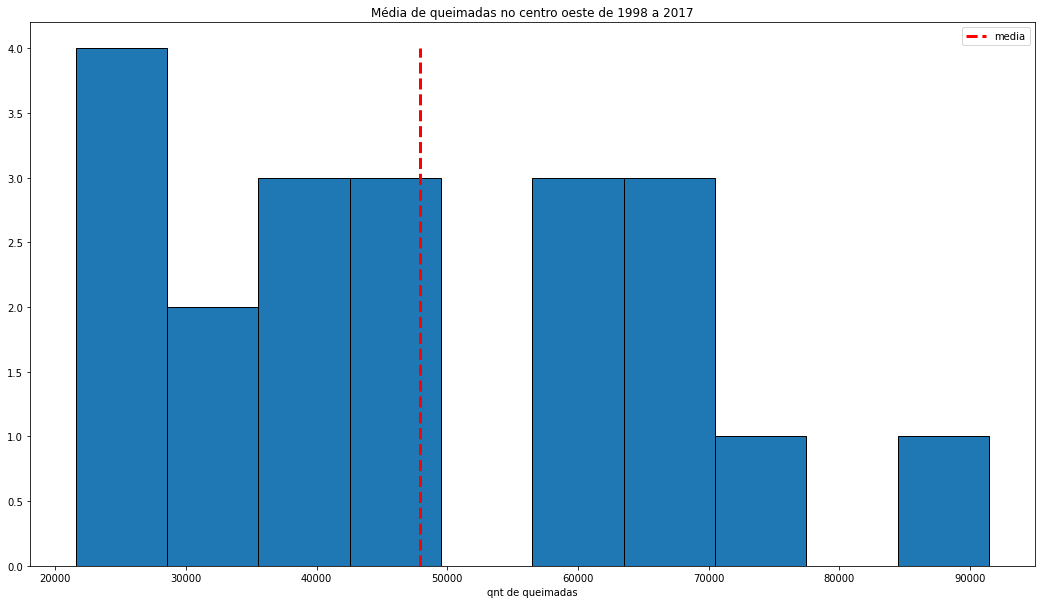

In [ ]:
plt.figure(figsize=(18, 10))
plt.hist(df_centro_oeste,edgecolor='k', bins=None,lw=1)
plt.vlines(df_centro_oeste.mean(), 0, 4, label='media', color='red',linestyles='--',lw=3)
plt.xlabel('qnt de queimadas')
plt.title('Média de queimadas no centro oeste de 1998 a 2017')
plt.legend()

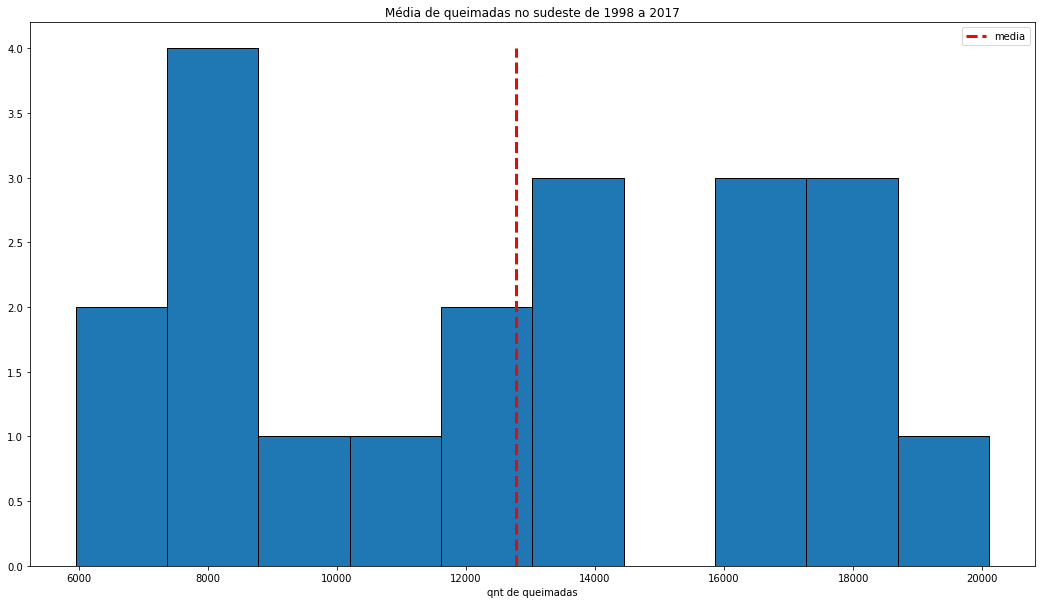

In [ ]:
plt.figure(figsize=(18, 10))
plt.hist(df_sudeste,edgecolor='k', bins=None,lw=1)
plt.vlines(df_sudeste.mean(), 0, 4, label='media', color='red',linestyles='--',lw=3)
plt.xlabel('qnt de queimadas')
plt.title('Média de queimadas no sudeste de 1998 a 2017')
plt.legend()

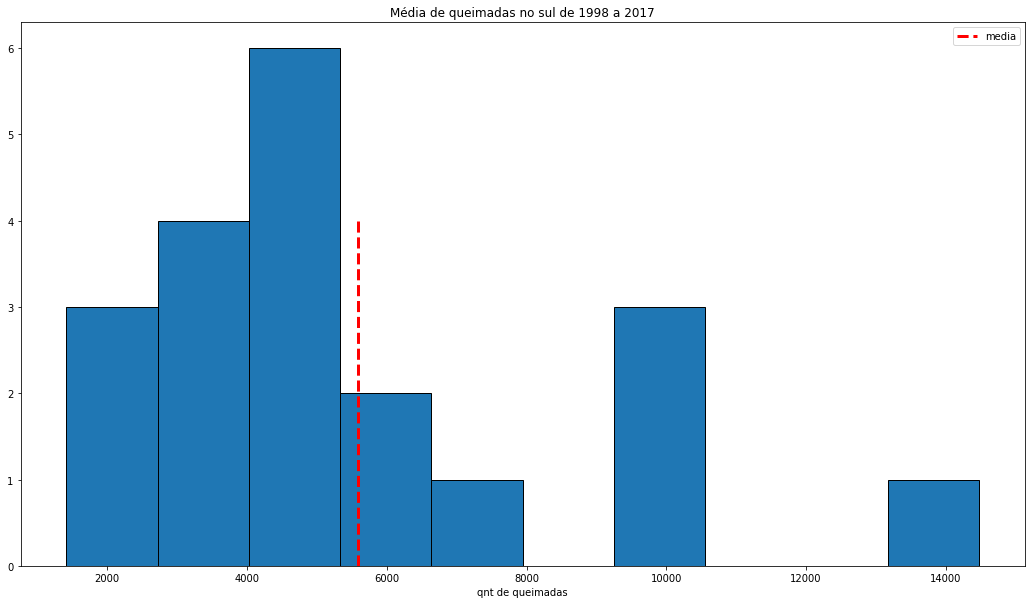

In [ ]:
plt.figure(figsize=(18, 10))
plt.hist(df_sul,edgecolor='k', bins=None,lw=1)
plt.vlines(df_sul.mean(), 0, 4, label='media', color='red',linestyles='--',lw=3)
plt.xlabel('qnt de queimadas')
plt.title('Média de queimadas no sul de 1998 a 2017')
plt.legend()

## *Pergunta 2 - Há um aumento no número de ocorrências com o passar do tempo, e é possível realizar suas previsões por períodos governamentais?*

### Relatório - Pergunta 2

Relatório: 
Essa pergunta foi abordada, primeiramente, com uma análise exploratória dos dados. Após verificação da base de dados, decidiu-se por escolher um modelo para representação tal que este seja o número total de queimadas por ano, presentes em um novo ‘data frame’(df). Os dados obtidos foram organizados em uma tabela, gráfico de barras, gráfico de linhas e um histograma. Depois, houve uma análise das estatísticas básicas presentes no df, como média, mediana, valores máximo e mínimo, e também a representação dessas em um gráfico de linhas. Além das estatísticas básicas, também examinou-se as medidas de variância e realizou as mesmas interpretações dos indicadores anteriores.
Logo após essa exploração inicial dos dados, fez-se necessário uma divisão melhor e por períodos governamentais. Sabendo disso, foram criados 7 novos df’s, a partir do primeiro gerado e com o auxílio da estrutura ‘query’ para seleção desejada, em que cada um continha as informações correspondentes ao período de governo de um específico presidente. No entanto, como a base de dados não possuía dados completos para todos os anos de governo de todos os presidentes, alguns df’s acabaram por ficar com um número menor de informações (isso foi verificado e apresentado). Agora, com essa nova separação, começou-se à fazer testes de hipóteses. Com isso, primeiramente foi gerado um intervalo de confiança, do número total de queimadas, para aqueles períodos de governo que dispunham de uma quantidade razoável de dados, sendo representados por dados limites inferior e superior. Contudo, como esse primeiro método para obtenção de intervalos de confiança requer um número minimamente razoável de dados, não foi possível realizá-lo para todos os períodos. Para estes outros, foi feito um ‘bootstrap’ para simular amostras e ter um número de dados suficientes para uma boa representação do intervalo desejado. Desse modo, foi possível obter os limites inferiores e superiores para o intervalo de confiança. Além disso, representou-se todas as novas amostras simuladas em um histograma.
Depois, houve o início da realização das regressões lineares, com o auxílio da biblioteca “sklearn”. Esse modelo foi escolhido pois é o mais adequado aos dados presentes na base de dados. Primeiro, fez-se uma regressão linear para o número total de queimadas de todos os anos da base, ou seja, um modelo geral de regressão. Além disso, verificou-se o coeficiente de determinação e o erro absoluto médio para averiguar a qualidade do modelo. Ainda nesse caso, foi feito também um gráfico para representar a regressão. Logo após, repetiu-se todo esse processo para todos os governos que apresentavam dados em mais de 1 ano. Por último, fez-se a técnica KNN, de K-vizinhos mais próximos, para o número de queimadas e anos ocorridos. Para isso, primeiro, houve uma Z-normalização dos dados, necessária para os processos a seguir. Com isso, foi possível realizar treinos, validações e testes, de forma a obter todas as saídas e métricas(precisão, revocação, F1 e a matriz de confusão) desejadas para avaliar o modelo e os períodos em questão.


### Análise Exploratória dos Dados - Pergunta 2

In [ ]:
##Número total de queimadas por ano
df_number_by_year = df.groupby('Ano').sum()['Número'].reset_index().rename(columns={'Ano': 'Ano', 'Número': 'Quantidade de Queimadas'})
df_number_by_year

,Ano,Quantidade de Queimadas
0,1998,123881
1,1999,134596
2,2000,101528
3,2001,145567
4,2002,235792
5,2003,235242
6,2004,270384
7,2005,240764
8,2006,136890
9,2007,231252


Text(0.5, 1.0, 'Gráfico de Barras')

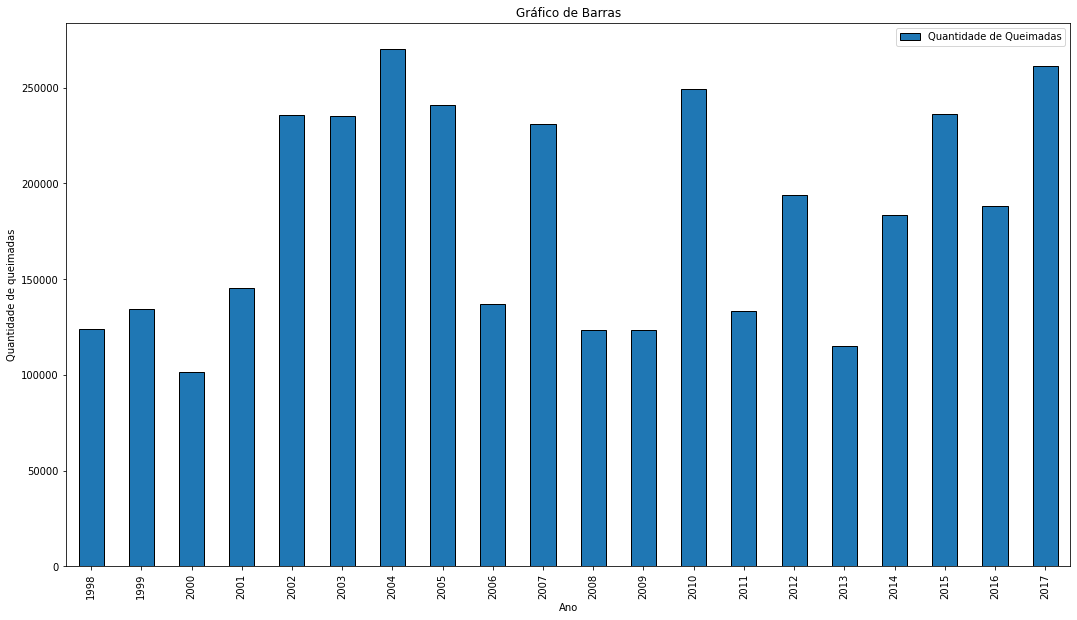

In [ ]:
##Visualização do problema utilizando gráfico de barras
df_number_by_year.plot.bar(x='Ano', y='Quantidade de Queimadas',figsize=(18, 10), edgecolor='k');
plt.xlabel('Ano')
plt.ylabel('Quantidade de queimadas')
plt.title("Gráfico de Barras")

Text(0.5, 1.0, 'Gráfico de Linhas')

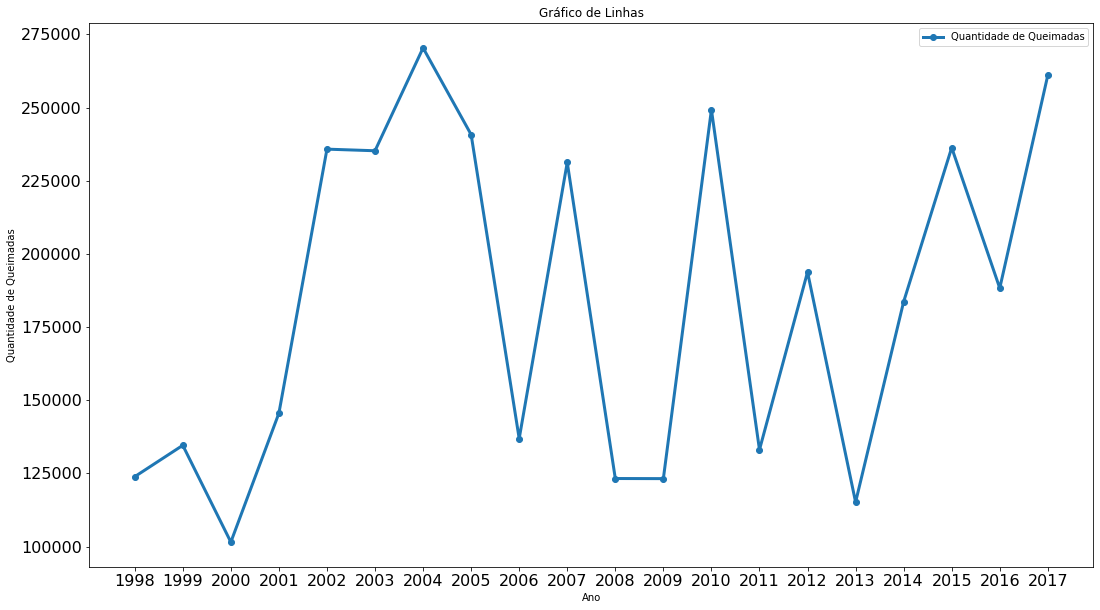

In [ ]:
##Visualização do problema utilizando gráfico em linhas
df_number_by_year.plot(x='Ano', y='Quantidade de Queimadas', figsize=(18, 10), fontsize=16, lw=3,marker="o")
plt.xlabel('Ano')
plt.xticks([1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017])
plt.ylabel('Quantidade de Queimadas');
plt.title("Gráfico de Linhas")

Text(0.5, 1.0, 'Histograma')

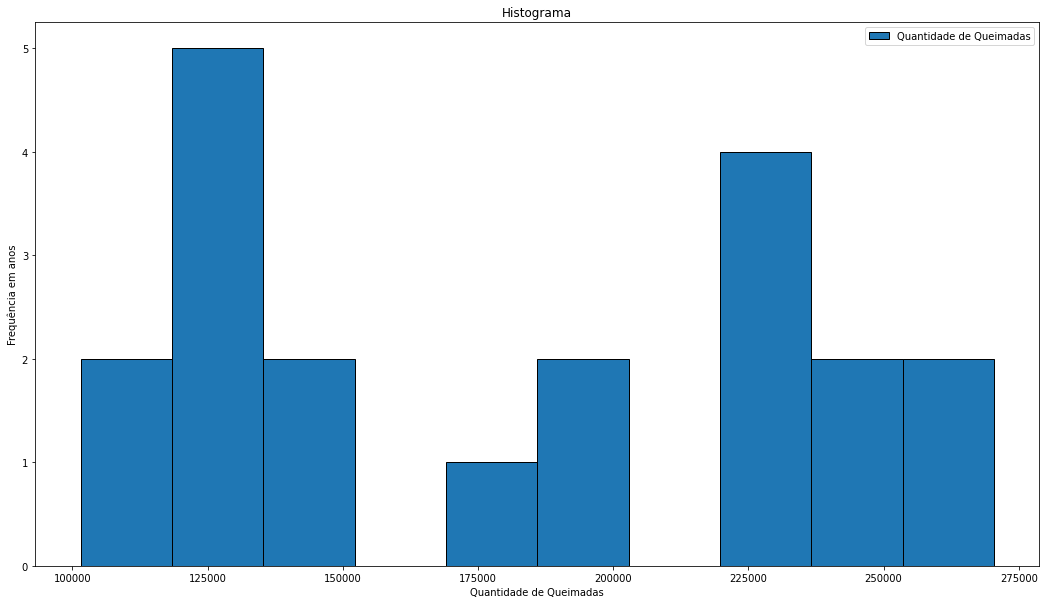

In [ ]:
##Visualização do problema utilizando um histograma
df_number_by_year.plot.hist(x='Ano', y='Quantidade de Queimadas',figsize=(18, 10), edgecolor='k');
plt.xlabel('Quantidade de Queimadas')
plt.ylabel('Frequência em anos')
plt.title("Histograma")

In [ ]:
##Estatísticas básicas
years_mean = df_number_by_year['Quantidade de Queimadas'].mean()
print("Média de queimadas por ano:",years_mean)
years_median = df_number_by_year['Quantidade de Queimadas'].median()
print("Mediana de queimadas dos anos:", years_median)
min_ = df_number_by_year['Quantidade de Queimadas'].min()
print("Valor mínimo de queimadas em um ano:",min_)
max_ = df_number_by_year['Quantidade de Queimadas'].max()
print("Valor máximo de queimadas em um ano:", max_)

Média de queimadas por ano: 183151.5
Mediana de queimadas dos anos: 185977.5
Valor mínimo de queimadas em um ano: 101528
Valor máximo de queimadas em um ano: 270384


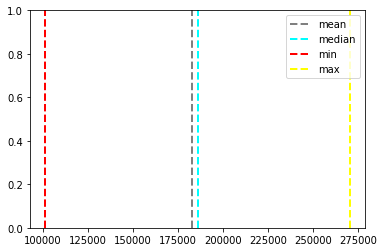

In [ ]:
##Visualização das estatísticas básicas acima em linhas no gráfico
plt.axvline(x=years_mean, color = 'gray', linestyle='dashed', linewidth = 2, label='mean')
plt.axvline(x=years_median, color = 'cyan', linestyle='dashed', linewidth = 2, label='median')
plt.axvline(x=min_, color = 'red', linestyle='dashed', linewidth = 2, label='min')
plt.axvline(x=max_, color = 'yellow', linestyle='dashed', linewidth = 2, label='max')
plt.legend()

In [ ]:
##Medidas de variância
rng = df_number_by_year['Quantidade de Queimadas'].max() - df_number_by_year['Quantidade de Queimadas'].min()
print("Intervalo:",rng)
var = df_number_by_year['Quantidade de Queimadas'].var(ddof=1)
print("Variância:",var)
std = df_number_by_year['Quantidade de Queimadas'].std(ddof=1)
print("Desvio Padrão:",std)

Intervalo: 168856
Variância: 3291130926.263158
Desvio Padrão: 57368.37914969498


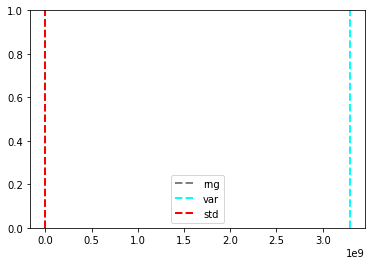

In [ ]:
##Visualização das medidas de variância em linhas no gráfico
plt.axvline(x=rng, color = 'gray', linestyle='dashed', linewidth = 2, label='rng')
plt.axvline(x=var, color = 'cyan', linestyle='dashed', linewidth = 2, label='var')
plt.axvline(x=std, color = 'red', linestyle='dashed', linewidth = 2, label='std')
plt.legend()

### Testes de Hipóteses - Pergunta 2

Realizando a separação de dados por governos:

In [ ]:
##Nos nomes dos df's, xm representa o número x do mandato 
df_fhc_1m = df.query('Ano >= 1995 and Ano <= 1998')
df_fhc_2m = df.query('Ano >= 1999 and Ano <= 2002')
df_lula_1m = df.query('Ano >= 2003 and Ano <= 2006')
df_lula_2m = df.query('Ano >= 2007 and Ano <= 2010')
df_dilma_1m = df.query('Ano >= 2011 and Ano <= 2014')
df_dilma_2m = df.query('Ano >= 2015 and Ano <= 2016')
df_temer_1m = df.query('Ano >= 2017 and Ano <= 2018')

In [ ]:
##Verificando o número de dados presentes em cada governo
fhc_1m_size = len(df_fhc_1m)
print("FHC 1: ", fhc_1m_size)
fhc_2m_size = len(df_fhc_2m)
print("FHC 2: ", fhc_2m_size)
lula_1m_size = len(df_lula_1m)
print("LULA 1: ", lula_1m_size)
lula_2m_size = len(df_lula_2m)
print("LULA 2: ", lula_2m_size)
dilma_1m_size = len(df_dilma_1m)
print("DILMA 1: ", dilma_1m_size)
dilma_2m_size = len(df_dilma_2m)
print("DILMA 2: ", dilma_2m_size)
temer_1m_size = len(df_temer_1m) 
print("TEMER 1: ", temer_1m_size)

FHC 1:  324
FHC 2:  1296
LULA 1:  1296
LULA 2:  1296
DILMA 1:  1296
DILMA 2:  648
TEMER 1:  298


Queremos fazer um intervalo de confiança do número total de queimadas para todos os governos:

In [ ]:
alpha = 0.90
LI_fhc_2 = df_fhc_2m['Número'].sum() - ss.norm.ppf(alpha+(1-alpha)/2).round(2) * (df_fhc_2m['Número'].std(ddof=1) / np.sqrt(fhc_2m_size))
LS_fhc_2 = df_fhc_2m['Número'].sum() + ss.norm.ppf(alpha+(1-alpha)/2).round(2) * (df_fhc_2m['Número'].std(ddof=1) / np.sqrt(fhc_2m_size))
print('Intervalo de Confiança para FHC 2: [{}, {}]'.format(LI_fhc_2.round(4), LS_fhc_2.round(4)))

LI_lula_1 = df_lula_1m['Número'].sum() - ss.norm.ppf(alpha+(1-alpha)/2).round(2) * (df_lula_1m['Número'].std(ddof=1) / np.sqrt(lula_1m_size))
LS_lula_1 = df_lula_1m['Número'].sum() + ss.norm.ppf(alpha+(1-alpha)/2).round(2) * (df_lula_1m['Número'].std(ddof=1) / np.sqrt(lula_1m_size))
print('Intervalo de Confiança para LULA 1: [{}, {}]'.format(LI_lula_1.round(4), LS_lula_1.round(4)))

LI_lula_2 = df_lula_2m['Número'].sum() - ss.norm.ppf(alpha+(1-alpha)/2).round(2) * (df_lula_2m['Número'].std(ddof=1) / np.sqrt(lula_2m_size))
LS_lula_2 = df_lula_2m['Número'].sum() + ss.norm.ppf(alpha+(1-alpha)/2).round(2) * (df_lula_2m['Número'].std(ddof=1) / np.sqrt(lula_2m_size))
print('Intervalo de Confiança para LULA 2: [{}, {}]'.format(LI_lula_2.round(4), LS_lula_2.round(4)))

LI_dilma_1 = df_dilma_1m['Número'].sum() - ss.norm.ppf(alpha+(1-alpha)/2).round(2) * (df_dilma_1m['Número'].std(ddof=1) / np.sqrt(dilma_1m_size))
LS_dilma_1 = df_dilma_1m['Número'].sum() + ss.norm.ppf(alpha+(1-alpha)/2).round(2) * (df_dilma_1m['Número'].std(ddof=1) / np.sqrt(dilma_1m_size))
print('Intervalo de Confiança para DILMA 1: [{}, {}]'.format(LI_dilma_1.round(4), LS_dilma_1.round(4)))

Intervalo de Confiança para FHC 2: [617417.7429, 617548.2571]
Intervalo de Confiança para LULA 1: [883191.2877, 883368.7123]
Intervalo de Confiança para LULA 2: [726905.7844, 727066.2156]
Intervalo de Confiança para DILMA 1: [625661.1486, 625768.8514]


Queremos realizar bootstrap para criar um intervalo de confiança do número 
total de queimadas para aqueles que dispomos de poucos dados
Sendo assim, realizaremos para FHC em seu primeiro mandato, Dilma em seu segundo e para Temer:

In [ ]:
##Bootstrap para FHC 1

n_sub = 1000 ##Número de sub-amostras
values_fhc_1 = np.zeros(n_sub)
for i in range(n_sub):
  sample = df_fhc_1m.sample(fhc_1m_size, replace=True, random_state=i) 
  values_fhc_1[i] = sample['Número'].sum()
  
# Gerando valores inferior e superior para um nível de confiança de 90%
LI_fhc_1 = (np.percentile(values_fhc_1, 5.0))
LS_fhc_1 = (np.percentile(values_fhc_1, 95.0))

print('Intervalo de Confiança para FHC 1: [{}, {}]'.format(LI_fhc_1.round(4), LS_fhc_1.round(4)))

Intervalo de Confiança para FHC 1: [88311.05, 164591.5]


Text(0.5, 1.0, 'Queimadas FHC 1 Mandato')

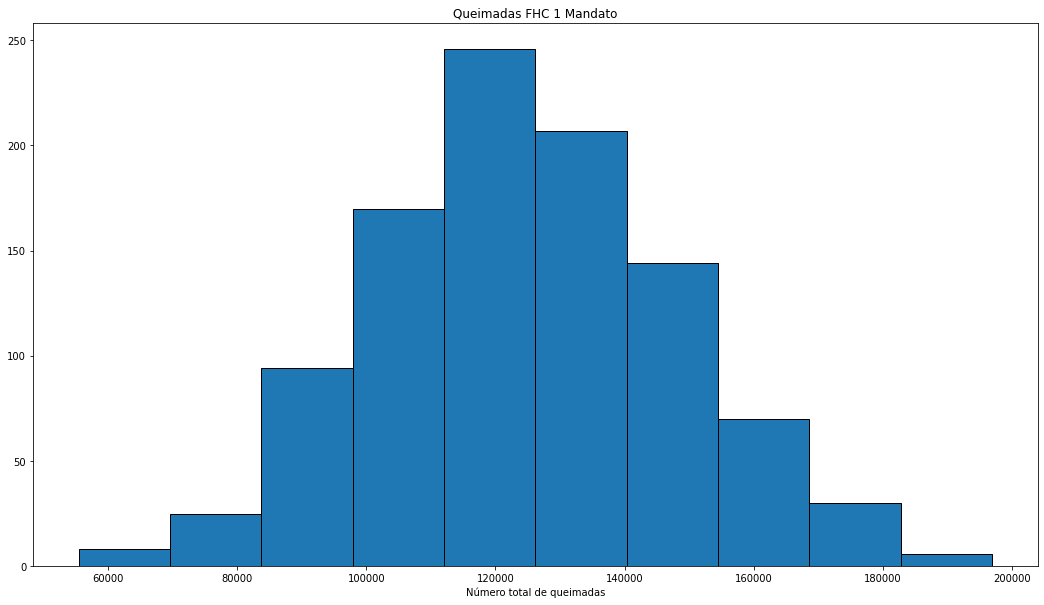

In [ ]:
plt.figure(figsize=(18, 10))
plt.hist((values_fhc_1),edgecolor='k', bins=None,lw=1)
plt.xlabel('Número total de queimadas')
plt.title('Queimadas FHC 1 Mandato')

In [ ]:
##Bootstrap para Temer

n_sub = 1000 ##Número de sub-amostras
values_temer_1 = np.zeros(n_sub)
for i in range(n_sub):
  sample = df_temer_1m.sample(temer_1m_size, replace=True, random_state=i) 
  values_temer_1[i] = sample['Número'].sum()
  
# Gerando valores inferior e superior para um nível de confiança de 90%
LI_temer_1 = (np.percentile(values_temer_1, 5.0))
LS_temer_1 = (np.percentile(values_temer_1, 95.0))

print('Intervalo de Confiança para Temer 1: [{}, {}]'.format(LI_temer_1.round(4), LS_temer_1.round(4)))

Intervalo de Confiança para Temer 1: [190828.1, 340314.85]


Text(0.5, 1.0, 'Queimadas Temer 1 Mandato')

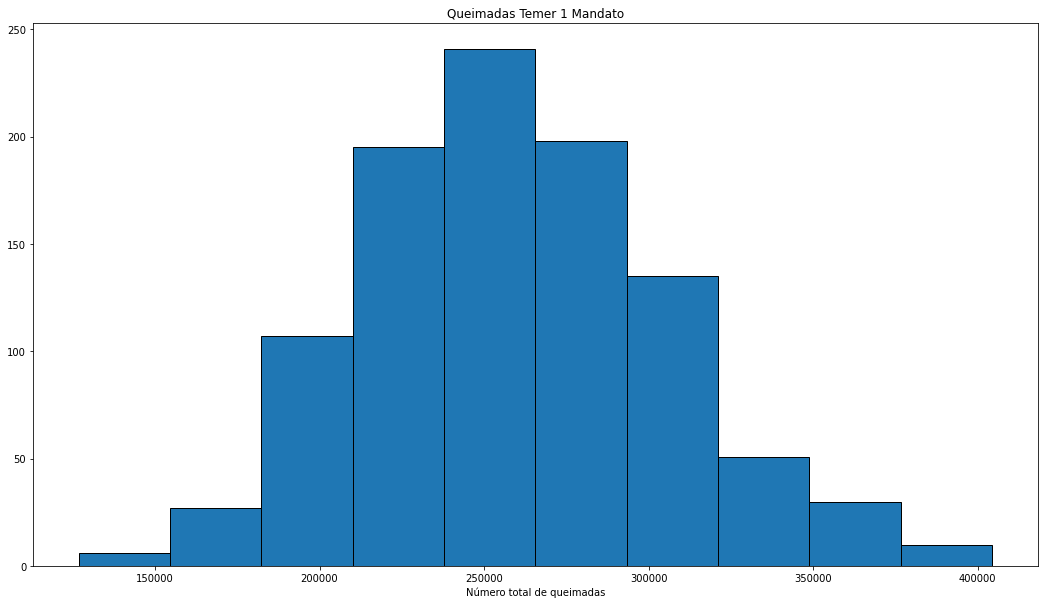

In [ ]:
plt.figure(figsize=(18, 10))
plt.hist(values_temer_1,edgecolor='k', bins=None,lw=1)
plt.xlabel('Número total de queimadas')
plt.title('Queimadas Temer 1 Mandato')

In [ ]:
##Bootstrap para Dilma 2

n_sub = 1000 ##Número de sub-amostras
values_dilma_2 = np.zeros(n_sub)
for i in range(n_sub):
  sample = df_dilma_2m.sample(dilma_2m_size, replace=True, random_state=i) 
  values_dilma_2[i] = sample['Número'].sum()
  
# Gerando valores inferior e superior para um nível de confiança de 90%
LI_dilma_2 = (np.percentile(values_dilma_2, 5.0))
LS_dilma_2 = (np.percentile(values_dilma_2, 95.0))

print('Intervalo de Confiança para Dilma 2: [{}, {}]'.format(LI_dilma_2.round(4), LS_dilma_2.round(4)))

Intervalo de Confiança para Dilma 2: [365120.7, 482395.8]


Text(0.5, 1.0, 'Queimadas Dilma 2 Mandato')

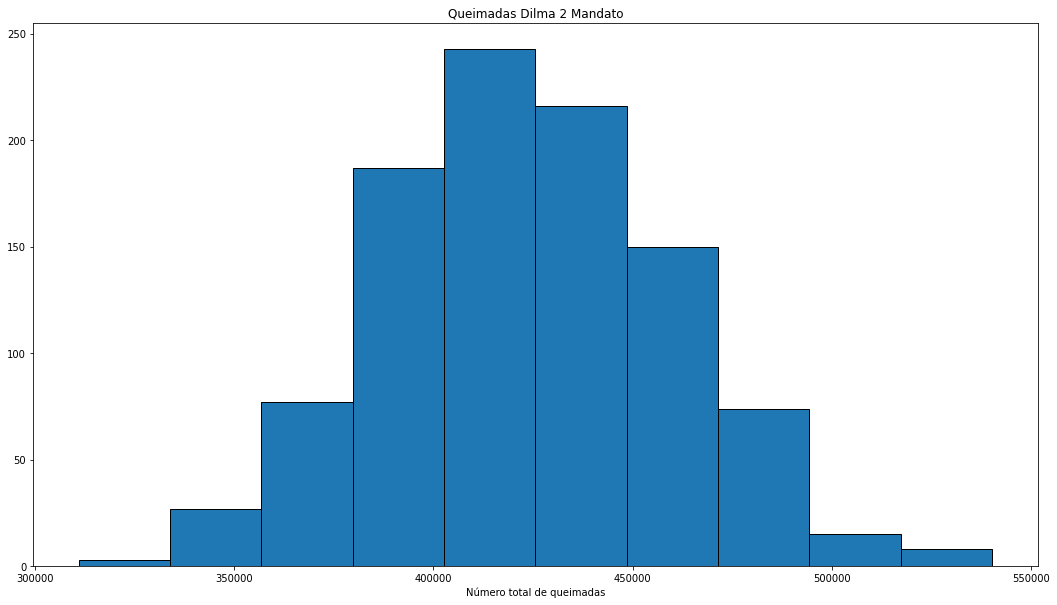

In [ ]:
plt.figure(figsize=(18, 10))
plt.hist(values_dilma_2,edgecolor='k', bins=None,lw=1)
plt.xlabel('Número total de queimadas')
plt.title('Queimadas Dilma 2 Mandato')

### Regressões Lineares - Pergunta 2

Queremos agora realizar previsões para os números de queimadas por governos:

r2: 0.06425663715217611
mae: 48751.17338345852


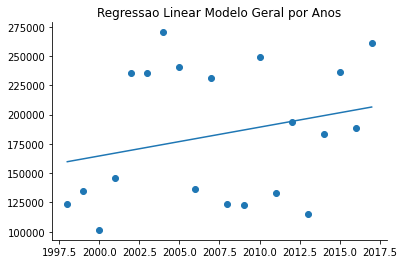

In [ ]:
##Primeiro, um modelo geral para todo o período anual contido pela base de dados

df_number_by_year
model = LinearRegression()
x = df_number_by_year['Ano'].values
x = x.reshape(-1,1)
y = df_number_by_year['Quantidade de Queimadas'].values
reg = model.fit(x,y)
y_pred = reg.predict(x)
r_square = reg.score(x,y)
mae = mean_absolute_error(y, y_pred)
print("r2:", r_square)
print("mae:", mae)
plt.scatter(df_number_by_year['Ano'].values,y)
plt.plot(df_number_by_year['Ano'].values,y_pred)
plt.title("Regressao Linear Modelo Geral por Anos")
despine()

r2: 0.3153674659451038
mae: 222578.39627039628


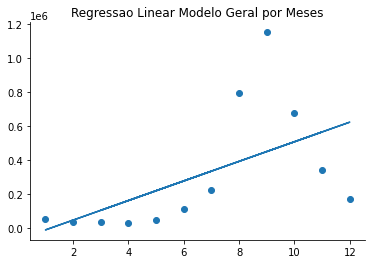

In [ ]:
##Agora, um modelo geral para todo o período mensal contido pela base de dados

df_number_by_month = df.groupby('Mês').sum()['Número'].reset_index().rename(columns={'Mês': 'Mês', 'Número': 'Quantidade de Queimadas'})
df_number_by_month.loc[df_number_by_month['Mês'] == "Janeiro", 'Mês'] = 1
df_number_by_month.loc[df_number_by_month['Mês'] == "Fevereiro", 'Mês'] = 2
df_number_by_month.loc[df_number_by_month['Mês'] == "Março", 'Mês'] = 3
df_number_by_month.loc[df_number_by_month['Mês'] == "Abril", 'Mês'] = 4
df_number_by_month.loc[df_number_by_month['Mês'] == "Maio", 'Mês'] = 5
df_number_by_month.loc[df_number_by_month['Mês'] == "Junho", 'Mês'] = 6
df_number_by_month.loc[df_number_by_month['Mês'] == "Julho", 'Mês'] = 7
df_number_by_month.loc[df_number_by_month['Mês'] == "Agosto", 'Mês'] = 8
df_number_by_month.loc[df_number_by_month['Mês'] == "Setembro", 'Mês'] = 9
df_number_by_month.loc[df_number_by_month['Mês'] == "Outubro", 'Mês'] = 10
df_number_by_month.loc[df_number_by_month['Mês'] == "Novembro", 'Mês'] = 11
df_number_by_month.loc[df_number_by_month['Mês'] == "Dezembro", 'Mês'] = 12
df_number_by_month

model = LinearRegression()
x = df_number_by_month['Mês'].values
x = x.reshape(-1,1)
y = df_number_by_month['Quantidade de Queimadas'].values
reg = model.fit(x,y)
y_pred = reg.predict(x)
r_square = reg.score(x,y)
mae = mean_absolute_error(y, y_pred)
print("r2:", r_square)
print("mae:", mae)
plt.scatter(df_number_by_month['Mês'].values,y)
plt.plot(df_number_by_month['Mês'].values,y_pred)
plt.title("Regressao Linear Modelo Geral por Meses")
despine()

r2 para fhc 1: 0.35853228632252143
mae para fhc 1: 36331.24669774669


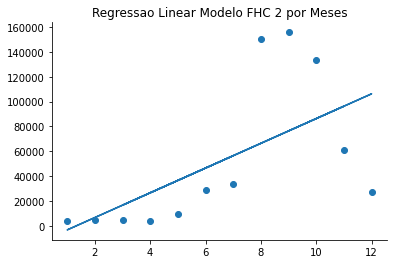

In [ ]:
##Regressão Linear para FHC 2

df_fhc_2m_values = df_fhc_2m.groupby('Mês').sum()['Número'].reset_index().rename(columns={'Mês': 'Mês', 'Número': 'Quantidade de Queimadas'})
df_fhc_2m_values.loc[df_fhc_2m_values['Mês'] == "Janeiro", 'Mês'] = 1
df_fhc_2m_values.loc[df_fhc_2m_values['Mês'] == "Fevereiro", 'Mês'] = 2
df_fhc_2m_values.loc[df_fhc_2m_values['Mês'] == "Março", 'Mês'] = 3
df_fhc_2m_values.loc[df_fhc_2m_values['Mês'] == "Abril", 'Mês'] = 4
df_fhc_2m_values.loc[df_fhc_2m_values['Mês'] == "Maio", 'Mês'] = 5
df_fhc_2m_values.loc[df_fhc_2m_values['Mês'] == "Junho", 'Mês'] = 6
df_fhc_2m_values.loc[df_fhc_2m_values['Mês'] == "Julho", 'Mês'] = 7
df_fhc_2m_values.loc[df_fhc_2m_values['Mês'] == "Agosto", 'Mês'] = 8
df_fhc_2m_values.loc[df_fhc_2m_values['Mês'] == "Setembro", 'Mês'] = 9
df_fhc_2m_values.loc[df_fhc_2m_values['Mês'] == "Outubro", 'Mês'] = 10
df_fhc_2m_values.loc[df_fhc_2m_values['Mês'] == "Novembro", 'Mês'] = 11
df_fhc_2m_values.loc[df_fhc_2m_values['Mês'] == "Dezembro", 'Mês'] = 12

model_fhc_2m = LinearRegression()
x = df_fhc_2m_values['Mês'].values
x = x.reshape(-1,1)
y = df_fhc_2m_values['Quantidade de Queimadas'].values
reg_fhc_2m = model_fhc_2m.fit(x,y)
predict_fhc_2m = reg_fhc_2m.predict(x)
r_square_fhc_2m = reg_fhc_2m.score(x,y)
mae_fhc_2m = mean_absolute_error(y, predict_fhc_2m)
print("r2 para fhc 1:", r_square_fhc_2m)
print("mae para fhc 1:", mae_fhc_2m)
plt.scatter(df_fhc_2m_values['Mês'].values,y)
plt.plot(df_fhc_2m_values['Mês'].values,predict_fhc_2m)
plt.title("Regressao Linear Modelo FHC 2 por Meses")
despine()

r2 para lula 1: 0.31671089959012255
mae para lula 1: 52404.92735042735


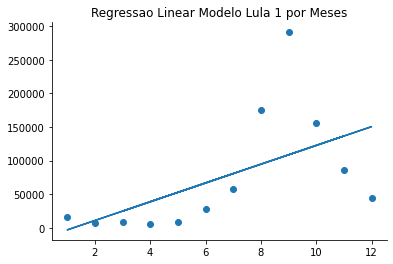

In [ ]:
##Regressão Linear para Lula 1

df_lula_1m_values = df_lula_1m.groupby('Mês').sum()['Número'].reset_index().rename(columns={'Mês': 'Mês', 'Número': 'Quantidade de Queimadas'})
df_lula_1m_values.loc[df_lula_1m_values['Mês'] == "Janeiro", 'Mês'] = 1
df_lula_1m_values.loc[df_lula_1m_values['Mês'] == "Fevereiro", 'Mês'] = 2
df_lula_1m_values.loc[df_lula_1m_values['Mês'] == "Março", 'Mês'] = 3
df_lula_1m_values.loc[df_lula_1m_values['Mês'] == "Abril", 'Mês'] = 4
df_lula_1m_values.loc[df_lula_1m_values['Mês'] == "Maio", 'Mês'] = 5
df_lula_1m_values.loc[df_lula_1m_values['Mês'] == "Junho", 'Mês'] = 6
df_lula_1m_values.loc[df_lula_1m_values['Mês'] == "Julho", 'Mês'] = 7
df_lula_1m_values.loc[df_lula_1m_values['Mês'] == "Agosto", 'Mês'] = 8
df_lula_1m_values.loc[df_lula_1m_values['Mês'] == "Setembro", 'Mês'] = 9
df_lula_1m_values.loc[df_lula_1m_values['Mês'] == "Outubro", 'Mês'] = 10
df_lula_1m_values.loc[df_lula_1m_values['Mês'] == "Novembro", 'Mês'] = 11
df_lula_1m_values.loc[df_lula_1m_values['Mês'] == "Dezembro", 'Mês'] = 12

model_lula_1m = LinearRegression()
x = df_lula_1m_values['Mês'].values
x = x.reshape(-1,1)
y = df_lula_1m_values['Quantidade de Queimadas'].values
reg_lula_1m = model_lula_1m.fit(x,y)
predict_lula_1m = reg_lula_1m.predict(x)
r_square_lula_1m = reg_lula_1m.score(x,y)
mae_lula_1m = mean_absolute_error(y, predict_lula_1m)
print("r2 para lula 1:", r_square_lula_1m)
print("mae para lula 1:", mae_lula_1m)
plt.scatter(df_lula_1m_values['Mês'].values,y)
plt.plot(df_lula_1m_values['Mês'].values,predict_lula_1m)
plt.title("Regressao Linear Modelo Lula 1 por Meses")
despine()

r2 para lula 1: 0.2644003497504702
mae para lula 1: 49317.61965811966


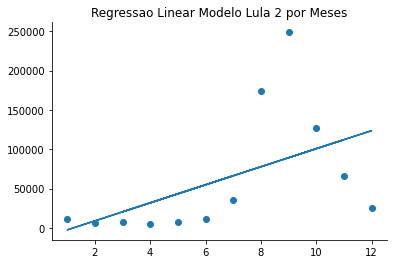

In [ ]:
##Regressão Linear para Lula 2

df_lula_2m_values = df_lula_2m.groupby('Mês').sum()['Número'].reset_index().rename(columns={'Mês': 'Mês', 'Número': 'Quantidade de Queimadas'})
df_lula_2m_values.loc[df_lula_2m_values['Mês'] == "Janeiro", 'Mês'] = 1
df_lula_2m_values.loc[df_lula_2m_values['Mês'] == "Fevereiro", 'Mês'] = 2
df_lula_2m_values.loc[df_lula_2m_values['Mês'] == "Março", 'Mês'] = 3
df_lula_2m_values.loc[df_lula_2m_values['Mês'] == "Abril", 'Mês'] = 4
df_lula_2m_values.loc[df_lula_2m_values['Mês'] == "Maio", 'Mês'] = 5
df_lula_2m_values.loc[df_lula_2m_values['Mês'] == "Junho", 'Mês'] = 6
df_lula_2m_values.loc[df_lula_2m_values['Mês'] == "Julho", 'Mês'] = 7
df_lula_2m_values.loc[df_lula_2m_values['Mês'] == "Agosto", 'Mês'] = 8
df_lula_2m_values.loc[df_lula_2m_values['Mês'] == "Setembro", 'Mês'] = 9
df_lula_2m_values.loc[df_lula_2m_values['Mês'] == "Outubro", 'Mês'] = 10
df_lula_2m_values.loc[df_lula_2m_values['Mês'] == "Novembro", 'Mês'] = 11
df_lula_2m_values.loc[df_lula_2m_values['Mês'] == "Dezembro", 'Mês'] = 12

model_lula_2m = LinearRegression()
x = df_lula_2m_values['Mês'].values
x = x.reshape(-1,1)
y = df_lula_2m_values['Quantidade de Queimadas'].values
reg_lula_2m = model_lula_2m.fit(x,y)
predict_lula_2m = reg_lula_2m.predict(x)
r_square_lula_2m = reg_lula_2m.score(x,y)
mae_lula_2m = mean_absolute_error(y, predict_lula_2m)
print("r2 para lula 1:", r_square_lula_2m)
print("mae para lula 1:", mae_lula_2m)
plt.scatter(df_lula_2m_values['Mês'].values,y)
plt.plot(df_lula_2m_values['Mês'].values,predict_lula_2m)
plt.title("Regressao Linear Modelo Lula 2 por Meses")
despine()

r2 para dilma 1: 0.3542470453876658
mae para dilma 1: 35089.38772338772


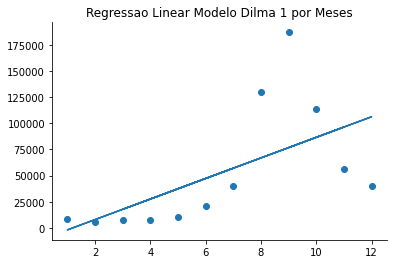

In [ ]:
##Regressão Linear para Dilma 1

df_dilma_1m_values = df_dilma_1m.groupby('Mês').sum()['Número'].reset_index().rename(columns={'Mês': 'Mês', 'Número': 'Quantidade de Queimadas'})
df_dilma_1m_values.loc[df_dilma_1m_values['Mês'] == "Janeiro", 'Mês'] = 1
df_dilma_1m_values.loc[df_dilma_1m_values['Mês'] == "Fevereiro", 'Mês'] = 2
df_dilma_1m_values.loc[df_dilma_1m_values['Mês'] == "Março", 'Mês'] = 3
df_dilma_1m_values.loc[df_dilma_1m_values['Mês'] == "Abril", 'Mês'] = 4
df_dilma_1m_values.loc[df_dilma_1m_values['Mês'] == "Maio", 'Mês'] = 5
df_dilma_1m_values.loc[df_dilma_1m_values['Mês'] == "Junho", 'Mês'] = 6
df_dilma_1m_values.loc[df_dilma_1m_values['Mês'] == "Julho", 'Mês'] = 7
df_dilma_1m_values.loc[df_dilma_1m_values['Mês'] == "Agosto", 'Mês'] = 8
df_dilma_1m_values.loc[df_dilma_1m_values['Mês'] == "Setembro", 'Mês'] = 9
df_dilma_1m_values.loc[df_dilma_1m_values['Mês'] == "Outubro", 'Mês'] = 10
df_dilma_1m_values.loc[df_dilma_1m_values['Mês'] == "Novembro", 'Mês'] = 11
df_dilma_1m_values.loc[df_dilma_1m_values['Mês'] == "Dezembro", 'Mês'] = 12

model_dilma_1m = LinearRegression()
x = df_dilma_1m_values['Mês'].values
x = x.reshape(-1,1)
y = df_dilma_1m_values['Quantidade de Queimadas'].values
reg_dilma_1m = model_dilma_1m.fit(x,y)
predict_dilma_1m = reg_dilma_1m.predict(x)
r_square_dilma_1m = reg_dilma_1m.score(x,y)
mae_dilma_1m = mean_absolute_error(y, predict_dilma_1m)
print("r2 para dilma 1:", r_square_dilma_1m)
print("mae para dilma 1:", mae_dilma_1m)
plt.scatter(df_dilma_1m_values['Mês'].values,y)
plt.plot(df_dilma_1m_values['Mês'].values,predict_dilma_1m)
plt.title("Regressao Linear Modelo Dilma 1 por Meses")
despine()

r2 para dilma 2: 0.39579050055681697
mae para dilma 2: 21740.842268842272


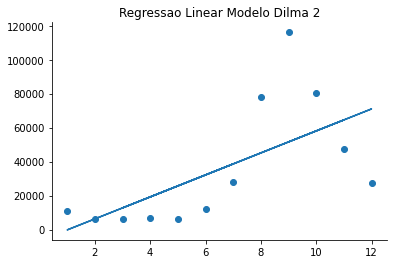

In [ ]:
##Regressão Linear para Dilma 2

df_dilma_2m_values = df_dilma_2m.groupby('Mês').sum()['Número'].reset_index().rename(columns={'Mês': 'Mês', 'Número': 'Quantidade de Queimadas'})
df_dilma_2m_values.loc[df_dilma_2m_values['Mês'] == "Janeiro", 'Mês'] = 1
df_dilma_2m_values.loc[df_dilma_2m_values['Mês'] == "Fevereiro", 'Mês'] = 2
df_dilma_2m_values.loc[df_dilma_2m_values['Mês'] == "Março", 'Mês'] = 3
df_dilma_2m_values.loc[df_dilma_2m_values['Mês'] == "Abril", 'Mês'] = 4
df_dilma_2m_values.loc[df_dilma_2m_values['Mês'] == "Maio", 'Mês'] = 5
df_dilma_2m_values.loc[df_dilma_2m_values['Mês'] == "Junho", 'Mês'] = 6
df_dilma_2m_values.loc[df_dilma_2m_values['Mês'] == "Julho", 'Mês'] = 7
df_dilma_2m_values.loc[df_dilma_2m_values['Mês'] == "Agosto", 'Mês'] = 8
df_dilma_2m_values.loc[df_dilma_2m_values['Mês'] == "Setembro", 'Mês'] = 9
df_dilma_2m_values.loc[df_dilma_2m_values['Mês'] == "Outubro", 'Mês'] = 10
df_dilma_2m_values.loc[df_dilma_2m_values['Mês'] == "Novembro", 'Mês'] = 11
df_dilma_2m_values.loc[df_dilma_2m_values['Mês'] == "Dezembro", 'Mês'] = 12

model_dilma_2m = LinearRegression()
x = df_dilma_2m_values['Mês'].values
x = x.reshape(-1,1)
y = df_dilma_2m_values['Quantidade de Queimadas'].values
reg_dilma_2m = model_dilma_2m.fit(x,y)
predict_dilma_2m = reg_dilma_2m.predict(x)
r_square_dilma_2m = reg_dilma_2m.score(x,y)
mae_dilma_2m = mean_absolute_error(y, predict_dilma_2m)
print("r2 para dilma 2:", r_square_dilma_2m)
print("mae para dilma 2:", mae_dilma_2m)
plt.scatter(df_dilma_2m_values['Mês'].values,y)
plt.plot(df_dilma_2m_values['Mês'].values,predict_dilma_2m)
plt.title("Regressao Linear Modelo Dilma 2")
despine()

### Classificação e ML - Pergunta 2

Queremos realizar um KNN para a base de dados em relação aos anos e número de queimadas, de forma a analisar seu desempenho. O classificador da base será o atributo dos anos, no que diz respeito às queimadas das duas metades de períodos dos dados.

Processo de Z-normalização:

In [ ]:
df_knn_nby = df.copy()
df_knn_nby.loc[:,'Ano'] = (df_knn_nby['Ano'] <= 2007).astype(int)
X = df_knn_nby.copy()
X = X.drop('Ano', axis=1)
y = df_knn_nby['Ano']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(5163, 4)
(1291, 4)


In [ ]:
non_strings = []
for i, col in enumerate(df_knn_nby.columns):
    if df_knn_nby.dtypes[i] != np.dtype('object'):
        non_strings.append(col)

In [ ]:
non_strings = non_strings[1::]
mean_train = X_train[non_strings].mean()
std_train = X_train[non_strings].std(ddof=1)

Z_train = X_train.copy()
Z_train[non_strings] = X_train[non_strings] - mean_train
Z_train[non_strings] = Z_train[non_strings] / std_train

Z_test = X_test.copy()
Z_test[non_strings] = X_test[non_strings] - mean_train
Z_test[non_strings] = Z_test[non_strings] / std_train

KNN -> Treino, Validação, Teste, Precisão, Revocação, F1 e Matriz de Confusão:

In [ ]:
D_train = pd.get_dummies(Z_train)
D_test = pd.get_dummies(Z_test)

In [ ]:
skf = StratifiedKFold(n_splits=5)
fold = 1
for train_index, val_index in skf.split(D_train, y_train):
  print("K:", fold)
  for k in [1, 3, 5, 7, 9, 11,13,15]:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(D_train.values[train_index],
              y_train.values[train_index])
    
    y_val = y_train.values[val_index]
    y_hat = knn_model.predict(D_train.values[val_index])
    
    confusion = confusion_matrix(y_val, y_hat)
    precision, recall, fscore, sup = precision_recall_fscore_support(y_val, y_hat, average='micro')
    reg_mse = mean_squared_error(y_val, y_hat)
    print("Precisão:", precision)
    print("Revocação:", recall)
    print("F1:", fscore)
    print("Matriz de Confusão:\n", confusion)
    print("mean squared error:\n", reg_mse)
  print()
  print()
  fold += 1

K: 1
Precisão: 0.755082284607938
Revocação: 0.755082284607938
F1: 0.755082284607938
Matriz de Confusão:
 [[382 126]
 [127 398]]
mean squared error:
 0.24491771539206195
Precisão: 0.8286544046466602
Revocação: 0.8286544046466602
F1: 0.8286544046466602
Matriz de Confusão:
 [[423  85]
 [ 92 433]]
mean squared error:
 0.1713455953533398
Precisão: 0.8683446272991288
Revocação: 0.8683446272991288
F1: 0.8683446272991286
Matriz de Confusão:
 [[436  72]
 [ 64 461]]
mean squared error:
 0.13165537270087124
Precisão: 0.9070667957405615
Revocação: 0.9070667957405615
F1: 0.9070667957405615
Matriz de Confusão:
 [[462  46]
 [ 50 475]]
mean squared error:
 0.09293320425943853
Precisão: 0.9264278799612778
Revocação: 0.9264278799612778
F1: 0.9264278799612778
Matriz de Confusão:
 [[471  37]
 [ 39 486]]
mean squared error:
 0.07357212003872217
Precisão: 0.9545014520813165
Revocação: 0.9545014520813165
F1: 0.9545014520813165
Matriz de Confusão:
 [[484  24]
 [ 23 502]]
mean squared error:
 0.045498547918683

### Relacionando os Resultados - Pergunta 2

Agora, os dados serão relacionados com os fatos históricos mais notáveis que ocorreram no país durante os períodos retratados. Evidentemente, a quantidade de queimadas, uma questão bastante multifatorial, não se deve à apenas resoluções do governo federal e presidência. No entanto, será colocado um principal fato de cada governo que, de forma razoável e interessante, auxilie na análise de verificação dos impactos nesse valor.
No governo de Fernando Henrique Cardoso, em 1998, foi assinado um veto ao artigo que proibia queimadas na Lei de Crimes Contra o Meio Ambiente, aprovada durante o seu próprio governo. Com isso, percebe-se o aumento imediato, devido ao incentivo gerado pelo veto, no número de queimadas já em 1999, mantendo-se em uma crescente taxa até o fim de seu segundo mandato.
Com o início do governo de Lula, essa quantidade de queimadas atingiu o valor recorde. No entanto, os valores começaram a diminuir a cada ano seguinte durante seus dois mandatos devido à criação do Plano de Prevenção e Controle do Desmatamento na Amazônia Legal, que auxiliou na queda dos valores na principal área de foco até então.
Já no período de governo de Dilma Rousseff, percebe-se outro aumento considerável das queimadas. Isso é explicado, especialmente, pelo corte de gastos realizados na prevenção e combate ao desmatamento, tal como cortes consideráveis no plano citado e apresentado durante o governo Lula. A queda de 72% desses gastos, portanto, é possivelmente o principal motivo para os níveis mais altos de quantidade de queimadas durante todo o seu período na presidência.
Por último, no único ano de governo de Michel Temer presente nos dados, verifica-se uma grande diminuição em relação aos dois anos anteriores. A principal medida que levou à isso, ao contrário de incentivos propostos pelo governo à criação de áreas para mineração, é a recomposição do orçamento do Ibama com recursos do Fundo Amazônia e outras organizações que auxiliam na prevenção do desmatamento, o que permitiu a retomada da fiscalização já no ano de 2017.


## *Pergunta 3 - Há uma mudança de estado que mais sofre com as queimadas com o passar do tempo?*


Separando os dados por região

In [ ]:
df_norte = df.query(
    "Estado == 'Acre' or Estado == 'Amapá' or Estado == 'Amazonas' or Estado == 'Pará' or Estado == 'Rondônia' or Estado == 'Roraima' or Estado == 'Tocantins'"
)
df_centro_oeste = df.query(
    "Estado == 'Goiás' or Estado == 'Mato Grosso' or Estado == 'Mato Grosso do Sul' or Estado == 'Distrito Federal'"
)
df_nordeste = df.query(
    "Estado == 'Alagoas' or Estado == 'Bahia' or Estado == 'Ceará' or Estado == 'Maranhão' or Estado == 'Paraíba' or Estado == 'Pernambuco' or Estado == 'Piauí' or Estado == 'Rio Grande do Norte' or Estado == 'Sergipe'"
)
df_sudeste = df.query(
    "Estado == 'Espírito Santo' or Estado == 'Minas Gerais' or Estado == 'Rio de Janeiro' or Estado == 'São Paulo'"
)
df_sul = df.query(
    "Estado == 'Paraná' or Estado == 'Rio Grande do Sul' or Estado == 'Santa Catarina'"
)


Importando as informações geográficas do Brasil

In [ ]:
# importando dados geograficos do Brasil
with urlopen(
    "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson"
) as response:
    Brazil = json.load(response)  # Javascrip object notation

state_id_map = {}
for feature in Brazil["features"]:
    feature["id"] = feature["properties"]["name"]
    state_id_map[feature["properties"]["sigla"]] = feature["id"]

Importante: É possível que os gráficos abaixo não sejam carregados ao rodar esse notebook através do Google Colab. Idealmente, rode esse notebook localmente para que os gráficos interativos sejam mostrados da melhor forma.

Antes de vermos o mapa completo do Brasil, analisaremos o comportamento de cada uma das regiões ao longo do tempo de modo a tentar reduzir as distorções que um gráfico com todas as regiões brasileiras causaria. Como as regiões têm biomas parecidos, essa parece ser uma boa métrica para dividir essa análise antes de olharmos para o país como um todo.

### Região Norte



In [ ]:
fig_norte = px.choropleth_mapbox(
    df_norte,
    locations="Estado",
    geojson=Brazil,  # informacoes geograficas do Brasil
    color="Número",
    color_continuous_scale="Viridis",
    mapbox_style="carto-positron",
    hover_name="Estado",  # the information in the box
    hover_data=["Número"], # a coluna de interesse
    center={"lat": -3.966559, "lon": -57.385635},  # centra o mapa na regiao Norte
    zoom=3.2,
    opacity=0.8,
    animation_frame="Ano",  # baseia a mudanca de plots nos anos
)


fig_norte.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig_norte.update_geos(fitbounds="locations", visible=False)
fig_norte.show()

Aqui podemos ver que o Pará é o estado da Região Norte que apresenta o maior número de ocorrências de queimadas. Roraima e Amapá tem alguns picos, ao longo do período, assim como o Amazonas.A tendência dos últimos anos é de aumento de queimadas na região como um todo, mas com foco principal bastante destacado no estado do Pará.

### Região Nordeste

In [ ]:
fig_nordeste = px.choropleth_mapbox(
    df_nordeste,
    locations="Estado",
    geojson=Brazil,  
    color="Número",
    color_continuous_scale="Viridis",
    mapbox_style="carto-positron",
    hover_name="Estado",  
    hover_data=["Número"],
    center={"lat": -8.384370, "lon": -40.888867},  # centers in nordeste
    zoom=3.3,
    opacity=0.8,
    animation_frame="Ano",  
)

fig_nordeste.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig_nordeste.update_geos(fitbounds="locations", visible=False)
fig_nordeste.show()

O Maranhão é o estado da Região Nordeste que mais se destaca na no número de ocorrências de queimadas, tendo essa dominância durante todo o período. Bahia  e Ceará possuem alguns picos ao longo desse tempo, principalmente nos períodos entre 2013 e 2016, quando essa região foi mais afetadas por focos de incêndios.

### Região Centro-Oeste

In [ ]:
fig_centro_oeste = px.choropleth_mapbox(
    df_centro_oeste,
    locations="Estado",
    geojson=Brazil, 
    color="Número",
    color_continuous_scale="Viridis",
    mapbox_style="carto-positron",
    hover_name="Estado",  
    hover_data=["Número"],
    center={"lat": -15.319302, "lon": -52.978053},  # centers in centro-oeste
    zoom=3.4,
    opacity=0.8,
    animation_frame="Ano",  
)

fig_centro_oeste.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig_centro_oeste.update_geos(fitbounds="locations", visible=False)
fig_centro_oeste.show()

O estado do Mato Grosso domina o número de ocorrências de queimadas registrado na região Centro-Oeste durante esse período. Apesar da dominância, o número geral de queimadas registradas não é tão alto como na região Norte, por exemplo.

### Região Sudeste

In [ ]:
fig_sudeste = px.choropleth_mapbox(
    df_sudeste,
    locations="Estado",
    geojson=Brazil, 
    color="Número",
    color_continuous_scale="Viridis",
    mapbox_style="carto-positron",
    hover_name="Estado", 
    hover_data=["Número"],
    center={"lat": -19.420684, "lon": -44.867503},  # centers in nordeste
    zoom=3.7,
    opacity=0.8,
    animation_frame="Ano",  
)

fig_sudeste.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig_sudeste.update_geos(fitbounds="locations", visible=False)
fig_sudeste.show()

Na Região Sudeste Minas Gerais e São Paulo se revezam como líderes de números de queimadas registradas, mas, no Geral, Minas Gerais domina essas estatísticas. Ao longo do período, 2009, 2013 e 2015 foram os anos com  maiores registros nesses dois estados, com uma decadência leve ao fim do período.

### Região Sul

In [ ]:
fig_sul = px.choropleth_mapbox(
    df_sul,
    locations="Estado",
    geojson=Brazil,  
    color="Número",
    color_continuous_scale="Viridis",
    mapbox_style="carto-positron",
    hover_name="Estado",  
    hover_data=["Número"],
    center={"lat": -27.549380, "lon": -51.459026},  # centers in nordeste
    zoom=3.8,
    opacity=0.8,
    animation_frame="Ano", 
)


fig_sul.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig_sul.update_geos(fitbounds="locations", visible=False)
fig_sul.show()

Na Região Sul do país Paraná e Rio Grande do Sul são os estados com maiores registros de números de queimadas. O Rio Grande do Sul, proporcionalmente para a região, parece ter sido bastante afetado durante o ano de 1998 e nos períodos mais antigos, enquanto o Paraná parece surgir com números maiores ao longo do tempo, com uma leve tendência de alta.


Agora, o país como um todo

### Número de queimadas registradas por estado no Brasil (1998-2017)

In [ ]:
fig_brasil = px.choropleth_mapbox(
    df,
    locations="Estado",
    geojson=Brazil,  
    color="Número",
    color_continuous_scale="Viridis",
    mapbox_style="carto-positron",
    hover_name="Estado",  
    hover_data=["Número"],
    center={"lat": -15.793889, "lon": -47.882778},  # centers in Brazil
    zoom=2.2,
    opacity=0.8,
    animation_frame="Ano",  
    title="Número de ocorrências de queimadas registradas no Brasil (1998-2017)",
)

fig_brasil.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig_brasil.update_geos(fitbounds="locations", visible=False)
fig_brasil.show()

Vendo o Brasil como um todo, podemos perceber que a região Norte domina os registros de número de queimadas no país, com uma alta bastante considerável nos anos mais recentes por números bastante altos do estado do Pará. O Centro-Oeste, inicialmente, é a região que fica em seguida nesse número de registros, mas que, com o passar do tempo, chega a ser superada pela Região Nordeste, que mantém essa dominância no ranking até os períodos mais recentes - quando a alta na região Centro-Oeste volta a alcançar essa região. Por fim, no Sul e Sudeste a tendência não é muito clara e parece haver uma baixa variabilidade nos dados, sendo a região Sul a parte do país com menor número de ocorrências registradas ao longo desse período.

## *Pergunta 4 - O tipo de produto Cultivado em uma região, tem relação com o número de incêndios ocorrido nessa mesma região?*


A princípio tivemos a ideia de fazer a pergunta se havia um bioma que mais sofria com os incêndios. Após nos familiarizarmos com a base de dados e fazer algumas explorações iniciais vimos que essa pergunta tinha muito em comum com a pergunta anterior, então nos veio uma pergunta que parecia mais interessante e mais diferente:
Existe uma relação entre o tipo de produto cultivado pela agricultura e o número de incêndios florestais na região?

Para fazer essa análise pegamos uma lista com os 10 principais produtos agrícolas do país, essa lista foi retirada do site: https://diarural.com.br/voce-sabe-quais-sao-os-10-principais-produtos-agricolas-no-brasil/
e com base nos dados fornecidos na página https://sidra.ibge.gov.br/tabela/1612 iremos responder a questão.

Note que não há dados no site sobre os produtos Café, Laranja, Tabaco e Cacau, portanto trabalharemos com os outros 6.

O que será analisado é a relação entre a produção em toneladas do produto e o número de incêndios em um determinado estado.

Para isso usaremos o rendimento médio da produção do estado para cada produto em quilo por hectare.

In [ ]:
algodao = pd.read_csv('https://raw.githubusercontent.com/userhv/Forest-Fires-in-Brazil/main/database_plus/Algodao.csv')
arroz = pd.read_csv('https://raw.githubusercontent.com/userhv/Forest-Fires-in-Brazil/main/database_plus/Arroz.csv')
cana = pd.read_csv ('https://raw.githubusercontent.com/userhv/Forest-Fires-in-Brazil/main/database_plus/Cana.csv')
mandioca = pd.read_csv ('https://raw.githubusercontent.com/userhv/Forest-Fires-in-Brazil/main/database_plus/Mandioca.csv')
milho = pd.read_csv ('https://raw.githubusercontent.com/userhv/Forest-Fires-in-Brazil/main/database_plus/Milho.csv')
soja = pd.read_csv ('https://raw.githubusercontent.com/userhv/Forest-Fires-in-Brazil/main/database_plus/Soja.csv')
Norte = ['Acre', 'Rondônia', 'Roraima', 'Amazonas', 'Pará', 'Amapá', 'Tocantins']
Nordeste = ['Maranhão', 'Pernambuco', 'Sergipe', 'Bahia', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Alagoas']
Centro_Oeste = ['Mato Grosso', 'Mato Grosso do Sul', 'Goiás', 'Distrito Federal']
Sudeste = ['Minas Gerais', 'Rio de Janeiro', 'São Paulo', 'Espírito Santo']
Sul = ['Paraná', 'Santa Catarina', 'Rio Grande do Sul']

Faremos agora um pré-processamento dos dados para prepará-los para as análises.

In [ ]:
def converte_valores (df):
  for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [ ]:
def prepara_plot (df):
  df = df.set_index('Unidade da Federação')
  converte_valores(df)
  df = df.T.rename_axis('Ano').reset_index().set_index('Ano')
  return df

In [ ]:
algodao = prepara_plot(algodao)
arroz = prepara_plot(arroz)
cana = prepara_plot (cana)
soja = prepara_plot(soja)
mandioca = prepara_plot(mandioca)
milho = prepara_plot(milho)

In [ ]:
def agrupa_prod (df):
  n = np.zeros(len(df.index))
  ne = np.zeros(len(df.index))
  co = np.zeros(len(df.index))
  se = np.zeros(len(df.index))
  s = np.zeros(len(df.index))
  for coluna in df.columns:
    i = 0
    for item in df[coluna]:
      if (not(np.isnan(item))):
        if coluna in Norte:
            n[i] = n[i]+item
        elif coluna in Nordeste:
            ne[i] = ne[i]+item
        elif coluna in Centro_Oeste:
            co[i] = co[i]+item
        elif coluna in Sudeste:
            se[i] = se[i]+item
        elif coluna in Sul:
            s[i] = s[i]+item
      i += 1
  regioes = pd.DataFrame(n, index = df.index, columns = ["Prod_Norte"])
  aux = np.asarray(ne)
  regioes["Prod_Nordeste"] = aux
  aux = np.asarray(co)
  regioes["Prod_Centro_Oeste"] = aux
  aux = np.asarray(s)
  regioes["Prod_Sul"] = aux
  aux = np.asarray(se)
  regioes["Prod_Sudeste"] = aux
  return regioes

In [ ]:
regioes_algodao = agrupa_prod(algodao)
regioes_arroz = agrupa_prod(arroz)
regioes_cana = agrupa_prod(cana)
regioes_soja = agrupa_prod(soja)
regioes_mandioca = agrupa_prod(mandioca)
regioes_milho = agrupa_prod(milho)

In [ ]:
def agrupa_incendios (df, quantidade_anos, df2):
  i=0
  n = np.zeros(quantidade_anos)
  ne = np.zeros(quantidade_anos)
  co = np.zeros(quantidade_anos)
  se = np.zeros(quantidade_anos)
  s = np.zeros(quantidade_anos)
  for linha in df.iterrows():
    if i > 19:
      i = 0
    if (not(np.isnan(linha[1]["Número"]))):
      if linha[1]["Estado"] in Norte:
          n[i] = n[i]+linha[1]["Número"]
      elif linha[1]["Estado"] in Nordeste:
          ne[i] = ne[i]+linha[1]["Número"]
      elif linha[1]["Estado"] in Centro_Oeste:
          co[i] = co[i]+linha[1]["Número"]
      elif linha[1]["Estado"] in Sudeste:
          se[i] = se[i]+linha[1]["Número"]
      elif linha[1]["Estado"] in Sul:
          s[i] = s[i]+linha[1]["Número"]
      i += 1
  regioes = pd.DataFrame(n, index = df2.index, columns = ["Norte"])
  aux = np.asarray(ne)
  regioes["Nordeste"] = aux
  aux = np.asarray(co)
  regioes["Centro_Oeste"] = aux
  aux = np.asarray(s)
  regioes["Sul"] = aux
  aux = np.asarray(se)
  regioes["Sudeste"] = aux
  return regioes

In [ ]:
incendios = agrupa_incendios(df, 20, algodao)
algodao = incendios.join(regioes_algodao)
arroz = incendios.join(regioes_arroz)
cana = incendios.join(regioes_cana)
mandioca = incendios.join(regioes_mandioca)
milho = incendios.join(regioes_milho)
soja = incendios.join(regioes_soja)

Note que: O que estamos querendo encontrar é uma correlação entre o tipo de produto produzido em uma região e o número de focos de incêndio dessa mesma região, para começar a analisar isso vamos primeiro plotar os pares ordenados (produção X numero de focos).

In [ ]:
algodao.plot.scatter('Norte', 'Prod_Norte')
algodao.plot.scatter('Nordeste', 'Prod_Nordeste')
algodao.plot.scatter('Centro_Oeste', 'Prod_Centro_Oeste')
algodao.plot.scatter('Sudeste', 'Prod_Sudeste')
algodao.plot.scatter('Sul', 'Prod_Sul')

In [ ]:
arroz.plot.scatter('Norte', 'Prod_Norte')
arroz.plot.scatter('Nordeste', 'Prod_Nordeste')
arroz.plot.scatter('Centro_Oeste', 'Prod_Centro_Oeste')
arroz.plot.scatter('Sudeste', 'Prod_Sudeste')
arroz.plot.scatter('Sul', 'Prod_Sul')

In [ ]:
cana.plot.scatter('Norte', 'Prod_Norte')
cana.plot.scatter('Nordeste', 'Prod_Nordeste')
cana.plot.scatter('Centro_Oeste', 'Prod_Centro_Oeste')
cana.plot.scatter('Sudeste', 'Prod_Sudeste')
cana.plot.scatter('Sul', 'Prod_Sul')

In [ ]:
milho.plot.scatter('Norte', 'Prod_Norte')
milho.plot.scatter('Nordeste', 'Prod_Nordeste')
milho.plot.scatter('Centro_Oeste', 'Prod_Centro_Oeste')
milho.plot.scatter('Sudeste', 'Prod_Sudeste')
milho.plot.scatter('Sul', 'Prod_Sul')

In [ ]:
mandioca.plot.scatter('Norte', 'Prod_Norte')
mandioca.plot.scatter('Nordeste', 'Prod_Nordeste')
mandioca.plot.scatter('Centro_Oeste', 'Prod_Centro_Oeste')
mandioca.plot.scatter('Sudeste', 'Prod_Sudeste')
mandioca.plot.scatter('Sul', 'Prod_Sul')

In [ ]:
soja.plot.scatter('Norte', 'Prod_Norte')
soja.plot.scatter('Nordeste', 'Prod_Nordeste')
soja.plot.scatter('Centro_Oeste', 'Prod_Centro_Oeste')
soja.plot.scatter('Sudeste', 'Prod_Sudeste')
soja.plot.scatter('Sul', 'Prod_Sul')

Podemos notar que aperentemente existe pouca relação entre o número de focos de incêndios e a produção da região, mas para termos certeza disso, calcularemos a correlação entre as duas variáveis.

In [ ]:
def corr(x, y):df["Número"].sort_values()
    n = len(x)
    x_m = x - np.mean(x)
    x_m = x_m / np.std(x, ddof=1)
    y_m = y - np.mean(y)
    y_m = y_m / np.std(y, ddof=1)
    return (x_m * y_m).sum() / (n - 1)

In [ ]:
print (corr(algodao['Norte'], algodao['Prod_Norte']))
print (corr(algodao['Nordeste'], algodao['Prod_Nordeste']))
print (corr(algodao['Centro_Oeste'], algodao['Prod_Centro_Oeste']))
print (corr(algodao['Sul'], algodao['Prod_Sul']))
print (corr(algodao['Sudeste'], algodao['Prod_Sudeste']))

In [ ]:
print (corr(arroz['Norte'], arroz['Prod_Norte']))
print (corr(arroz['Nordeste'], arroz['Prod_Nordeste']))
print (corr(arroz['Centro_Oeste'], arroz['Prod_Centro_Oeste']))
print (corr(arroz['Sul'], arroz['Prod_Sul']))
print (corr(arroz['Sudeste'], arroz['Prod_Sudeste']))

In [ ]:
print (corr(cana['Norte'], cana['Prod_Norte']))
print (corr(cana['Nordeste'], cana['Prod_Nordeste']))
print (corr(cana['Centro_Oeste'], cana['Prod_Centro_Oeste']))
print (corr(cana['Sul'], cana['Prod_Sul']))
print (corr(cana['Sudeste'], cana['Prod_Sudeste']))

In [ ]:
print (corr(mandioca['Norte'], mandioca['Prod_Norte']))
print (corr(mandioca['Nordeste'], mandioca['Prod_Nordeste']))
print (corr(mandioca['Centro_Oeste'], mandioca['Prod_Centro_Oeste']))
print (corr(mandioca['Sul'], mandioca['Prod_Sul']))
print (corr(mandioca['Sudeste'], mandioca['Prod_Sudeste']))

In [ ]:
print (corr(milho['Norte'], milho['Prod_Norte']))
print (corr(milho['Nordeste'], milho['Prod_Nordeste']))
print (corr(milho['Centro_Oeste'], milho['Prod_Centro_Oeste']))
print (corr(milho['Sul'], milho['Prod_Sul']))
print (corr(milho['Sudeste'], milho['Prod_Sudeste']))

In [ ]:
print (corr(soja['Norte'], soja['Prod_Norte']))
print (corr(soja['Nordeste'], soja['Prod_Nordeste']))
print (corr(soja['Centro_Oeste'], soja['Prod_Centro_Oeste']))
print (corr(soja['Sul'], soja['Prod_Sul']))
print (corr(soja['Sudeste'], soja['Prod_Sudeste']))

Podemos notar algo curioso com essa análise, de fato, pra grande maioria dos produtos podemos ver pouca correlação entre o número de focos e a produção, porém três casos merecem serem notados.
Para os produtos Cana, Mandioca e Milho na região Centro-Oeste há uma correlação positiva considerável.
Ou seja, a medida que a produção em quilo por hectare de cana e mandioca aumenta, o número de focos de incêndio na região aumenta também.
